In [1]:
!python -V
!pip show jupyterlab pandas plotly cufflinks seaborn openpyxl itables lxml pyarrow pip

Python 3.10.7
Name: jupyterlab
Version: 3.4.8
Summary: JupyterLab computational environment
Home-page: https://jupyter.org
Author: Jupyter Development Team
Author-email: jupyter@googlegroups.com
License: 
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: ipython, jinja2, jupyter-core, jupyter-server, jupyterlab-server, nbclassic, notebook, packaging, tomli, tornado
Required-by: 
---
Name: pandas
Version: 1.5.1
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\z_github_virtual_environment\ambiente_notebooks\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: cufflinks, itables, seaborn
---
Name: plotly
Version: 5.11.0
Summary: An open-source, interactive data visualization library for Python
Home-page: https://plotly.com/python/
Author: Chris P
Author-email: 

# <center>**LIBRERIAS Y FUNCIONES**</center>

In [2]:
# garbage colector para liberar recursos de variables usadas
import gc as garbage_colector

# ocultar los warnings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
# configura el maximo de filas y columnas a mostrar en el dataframe, en este caso TODAS LAS FILAS Y COLUMNAS
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# muestra todo el contenido de la fila en el dataframe por muy extenso que sea el contenido
pd.set_option('display.max_colwidth', None)


import random
import numpy as np

# configura las tablas interactivas
#from itables import init_notebook_mode

#init_notebook_mode(all_interactive=True)

# importa las funciones para crear los dataframes de los archivos locales
from utilidades import crear_dataframes, join_dataframe

df1, df2, df3 = crear_dataframes(limite_muestra = 100)

# <center>**LEER ARCHIVOS Y CONVERTIRLOS EN DATAFRAME**</center>

# <center>**JSON**</center>

In [3]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/json_dataframe.json'
json = pd.read_json(archivo)
json

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


# <center>**CSV**</center>

In [4]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/csv_dataframe.csv'
csv = pd.read_csv(archivo)
csv

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>**EXCEL**</center>

In [5]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
pd.read_excel(archivo, engine="openpyxl")

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,1,Chimpancés,Tortugas acuáticas,Los tiburones ballena,Ranas arcoíris,Gallinas
1,2,28,Chimpancés,Camaleones,Tiburones,Ajolotes,Loros
2,3,93,Vacas,Tortugas acuáticas,Tiburones,Salamandras comunes,Gaviotas
3,4,31,Ratones,Pterosaurios (extintos),Tiburones,Ranas arcoíris,Tucanes
4,5,32,Ballenas,Tortugas acuáticas,Peces payaso,Gallipatos,Gaviotas
5,6,59,Perros,Lagartos voladores australianos,Carpas,Ajolotes,Faisanes
6,7,58,Canguros,Pterosaurios (extintos),Peces globo,Ranas arborícolas,Pavos
7,8,67,Caballos,Lagartijas comunes,Peces vela,Sapos comunes,Pelícanos
8,9,5,Delfines,Dragones de Komodo,Peces abisales,Necturos,Pavorreales
9,10,66,Jirafas,Camaleones,Pirañas,Lisorofios (extintos),Pájaros carpinteros


In [6]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/excel_dataframes.xlsx'
excel = pd.read_excel(archivo, engine="openpyxl", sheet_name='dataframe_3')
excel

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


# <center>**HTML**</center>

In [7]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/html_dataframe.html'
pd.read_html(archivo, encoding="UTF-8")[0]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


# <center>**PARQUET**</center>

In [8]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/parquet_dataframe.parquet'
pd.read_parquet(archivo)

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>LIBERAMOS LOS RECURSOS USADOS POR LOS CONTENIDOS DE LAS VARIABLES QUE YA NO SE VAN A USAR**</center>

In [9]:
df1, df2, df3 = json, csv, excel
del excel
del csv
del json
del archivo
garbage_colector.collect(), garbage_colector.get_threshold()

(118, (700, 10, 10))

# <center>GUARDAR DATAFRAME A **JSON, CVS, EXCEL, HTML, PARQUET**</center>

In [10]:
df1.to_json('archivos/json_dataframe.json', orient ='records', indent=2)
df2.to_csv('archivos/csv_dataframe.csv', index=False)
df3.to_excel('archivos/excel_dataframe.xlsx', index=False, sheet_name='dataframe_1')
df1.to_html('archivos/html_dataframe.html', index=False)
df2.to_parquet('archivos/parquet_dataframe.parquet', index=False)

## <center>**PRINT VS DISPLAY**</center>

In [11]:
print(df1, df2)

     Id  Lider      Mamíferos                         Reptiles  \
0     1     42          Vacas  Lagartos voladores australianos   
1     2     32     Chimpancés                       Camaleones   
2     3     41         Leones                       Cocodrilos   
3     4     94          Vacas               Lagartijas comunes   
4     5     14        Ratones                          Iguanas   
5     6     32         Hienas                          Iguanas   
6     7     36         Leones                         Luciones   
7     8      7       Caballos               Tortugas galápagos   
8     9    100       Ballenas               Lagartijas comunes   
9    10     93  Seres humanos              Tortugas terrestres   
10   11     99          Orcas               Dragones de Komodo   
11   12     90     Chimpancés                          Víboras   
12   13     17   Rinocerontes                       Cocodrilos   
13   14      1        Gorilas           Dinosaurios (extintos)   
14   15   

In [12]:
display(df1, df2)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,6,92,Celacantos (extintos),Curilla o aceitera,Cocodrilo,Gorila,Toro
6,7,58,Anguilas de mar,Moscas domésticas,Abeja,Conejo del campo,Oryx
7,8,21,Bacalaos,Mariposa macaón,Pato,Zorro volador,Sambar
8,9,70,Microsaurios (extintos),Mariposa pavo real,Águila,Zarigüeya,Reno
9,10,86,Basiliscos,Moscas cernícalo,Avestruz,Tupaya enana,Niala


# <center>**SERIES VS DATAFRAME**</center>
### <center>**LAS SERIES ACTUAN COMO UNA LISTA CON INDICES UNIDIMENSIONALES ASOCIADOS A UNA COLUMNA**</center>
<center><img src="series_vs_dataframes.png"/></center>

In [13]:
materias = ['Matemáticas','Economía','Programación','Deportes','Artes']
notas = [6.0, 10, 8.5, 10, 9.3]
pd.Series(materias)

0     Matemáticas
1        Economía
2    Programación
3        Deportes
4           Artes
dtype: object

In [14]:
pd.Series(notas)

0     6.0
1    10.0
2     8.5
3    10.0
4     9.3
dtype: float64

### <center>**DEFINIENDO EL INDICE Y EL NOMBRE DE LA COLUMNA**</center>

In [15]:
pd.Series(data=notas, index=materias)

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
dtype: float64

In [16]:
pd.Series(data=notas, index=materias, name='Nota')

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO DICCIONARIOS**</center>

In [17]:
serie = pd.Series(data={'Matemáticas': 6.0,  'Economía': 10, 'Programación': 8.5, 'Deportes': 10, 'Artes': 9.3}, name='Nota')
print(type(serie))
serie

<class 'pandas.core.series.Series'>


Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**USANDO COLUMNAS DE DATAFRAMES**</center>
#### <center>**INDEX COMO UNA SOLA COLUMNA DE UN DATAFRAME Y COLUMNA COMO LISTA**</center>

In [18]:
colores= {'AMARILLO':[1,None,2,3,None,3,4,None,None,1],
'AZUL':[5,None,None,None,None,10,15,20,25,None],
'ROJO':[2,None,5,10,15,20,7,31,None,None],
'VERDE':[4,None,None,None,None,None,None,None,None,None],
'ROSADO':[3,6,9,12,15,18,21,24,27,30]}

for key, value in colores.items():
    print(key, len(value), value)
    
df_colores = pd.DataFrame(colores)
df_colores

AMARILLO 10 [1, None, 2, 3, None, 3, 4, None, None, 1]
AZUL 10 [5, None, None, None, None, 10, 15, 20, 25, None]
ROJO 10 [2, None, 5, 10, 15, 20, 7, 31, None, None]
VERDE 10 [4, None, None, None, None, None, None, None, None, None]
ROSADO 10 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


In [19]:
pd.Series(index=df_colores.AZUL, data=df_colores.ROSADO.to_list(), name='VALORES DE ROSADO')

AZUL
5.0      3
NaN      6
NaN      9
NaN     12
NaN     15
10.0    18
15.0    21
20.0    24
25.0    27
NaN     30
Name: VALORES DE ROSADO, dtype: int64

### <center>**COLUMNA DE DATAFRAME A SERIE**</center>

In [20]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

### <center>**FILA DE DATAFRAME A SERIE**</center>

In [23]:
df_colores

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


In [22]:
df_colores.loc[0]

AMARILLO    1.0
AZUL        5.0
ROJO        2.0
VERDE       4.0
ROSADO      3.0
Name: 0, dtype: float64

In [21]:
df_colores.iloc[0]

AMARILLO    1.0
AZUL        5.0
ROJO        2.0
VERDE       4.0
ROSADO      3.0
Name: 0, dtype: float64

### <center>**CONVERTIR SERIE A DATAFRAME**</center>

In [26]:
#salto de linea con el simbolo '\' inmediantamente despeus del ultimo caracter de la linea
df_colores.loc[0]\
                .to_frame()\
                .rename({0:'Total Valores Nulos'}, axis='columns')

,Total Valores Nulos
AMARILLO,1.0
AZUL,5.0
ROJO,2.0
VERDE,4.0
ROSADO,3.0


In [27]:
df_colores.iloc[0]\
                .to_frame(name='Total Valores Nulos')

,Total Valores Nulos
AMARILLO,1.0
AZUL,5.0
ROJO,2.0
VERDE,4.0
ROSADO,3.0


### <center>VALIDAR VALORES ENTRE UN RANGO ESPECIFICO **BETWEEN**</center>

In [30]:
display(df_colores.iloc[0].to_frame())
df_colores.iloc[0]\
                .between(left=1,right=4)\
                .to_frame()

,0
AMARILLO,1.0
AZUL,5.0
ROJO,2.0
VERDE,4.0
ROSADO,3.0


,0
AMARILLO,True
AZUL,False
ROJO,True
VERDE,True
ROSADO,True


In [31]:
# pone como falsos los valores de los limites
df_colores.iloc[0]\
                    .between(left=1,right=4,  inclusive="neither")\
                    .to_frame()

,0
AMARILLO,False
AZUL,False
ROJO,True
VERDE,False
ROSADO,True


### <center>EXTRAER VALORES DE UNA LISTA Y DEJARLO EN VALOR POR FILA EN UN DATAFRAME **EXPLODE**</center>

In [32]:
pd.Series([1, 6, 7, [46, 56, 49], 45, [15, 10, 12]])\
                                                    .to_frame("valores en listas")

,valores en listas
0,1
1,6
2,7
3,"[46, 56, 49]"
4,45
5,"[15, 10, 12]"


In [33]:
# se debe declarar el nombre de la columna a separar para extraer los datos de las listas
pd.Series([1, 6, 7, [46, 56, 49], 45, [15, 10, 12]])\
                                                    .to_frame("valores en listas")\
                                                    .explode(column="valores en listas", ignore_index=True)

,valores en listas
0,1
1,6
2,7
3,46
4,56
5,49
6,45
7,15
8,10
9,12


### <center>**ATRIBUTOS DE LAS SERIES**</center>

In [34]:
serie.shape

(5,)

In [35]:
serie.size

5

In [36]:
serie.dtype

dtype('float64')

In [37]:
serie.index

Index(['Matemáticas', 'Economía', 'Programación', 'Deportes', 'Artes'], dtype='object')

In [38]:
serie.values

array([ 6. , 10. ,  8.5, 10. ,  9.3])

In [39]:
serie.value_counts()

,Nota
10.0,2
6.0,1
8.5,1
9.3,1


In [ ]:
serie.sort_index(ascending=False)

Programación     8.5
Matemáticas      6.0
Economía        10.0
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

# <center>**ACCESO A DATOS DE LAS SERIES**</center>

### <center>**POR INDICE**</center>

In [42]:
serie.to_frame()

,Nota
Matemáticas,6.0
Economía,10.0
Programación,8.5
Deportes,10.0
Artes,9.3


In [43]:
serie['Deportes']

10.0

In [44]:
serie.Deportes

10.0

In [45]:
serie[3]

10.0

### <center>**POR RANGO ENTRE INDICES**</center>

In [48]:
display(serie)
print()
serie['Programación':'Artes']

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [47]:
serie[2:5]

Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

### <center>**POR INDICES ESPECIFICOS**</center>

In [49]:
serie[['Matemáticas','Programación','Artes']]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

In [50]:
serie[[0,2,4]]

Matemáticas     6.0
Programación    8.5
Artes           9.3
Name: Nota, dtype: float64

### <center>**ANALISIS DE DATOS**</center>

In [51]:
serie

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

In [52]:
# argmax posicion o indice donde encontro el valor maximo
serie.max(), serie.argmax()

(10.0, 1)

In [53]:
serie.min(), serie.argmin()

(6.0, 0)

In [56]:
serie.quantile(0.25), serie.quantile(0.5), serie.mean(), serie.median(), serie.mode()

(8.5,
 9.3,
 8.76,
 9.3,
 0    10.0
 Name: Nota, dtype: float64)

In [57]:
serie.std(), serie.sum(), serie.count(), serie.abs()

(1.6622274212634083,
 43.8,
 5,
 Matemáticas      6.0
 Economía        10.0
 Programación     8.5
 Deportes        10.0
 Artes            9.3
 Name: Nota, dtype: float64)

In [58]:
serie.describe()

count     5.000000
mean      8.760000
std       1.662227
min       6.000000
25%       8.500000
50%       9.300000
75%      10.000000
max      10.000000
Name: Nota, dtype: float64

Matemáticas      6.0
Economía        10.0
Programación     8.5
Deportes        10.0
Artes            9.3
Name: Nota, dtype: float64

<AxesSubplot: >

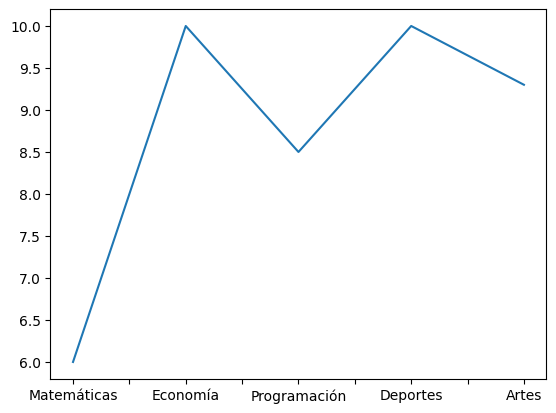

In [59]:
display(serie)
serie.plot()

# <center>DATAFRAMES</center>
## <center>OBTENER LOS TAMAÑOS DE UN DATAFRAME</center>

In [60]:
print(f'Cantidad de filas y columnas {df_colores.shape}')
print(f'Cantidad de filas {df_colores.shape[0]}')
print(f'Cantidad de columnas {df_colores.shape[1]}')
df_colores

Cantidad de filas y columnas (10, 5)
Cantidad de filas 10
Cantidad de columnas 5


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


# <center>**OBTENER EL RESUMEN DE LAS COLUMNAS DE UN DATAFRAME**</center>
## <center>**SOLO VALORES NO NULL**</center>

In [64]:
df_colores.info()                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AMARILLO  6 non-null      float64
 1   AZUL      5 non-null      float64
 2   ROJO      7 non-null      float64
 3   VERDE     1 non-null      float64
 4   ROSADO    10 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 528.0 bytes


In [65]:
df_colores.describe()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
count,6.000000,5.000000,7.000000,1.0,10.000000
mean,2.333333,15.000000,12.857143,4.0,16.500000
std,1.211060,7.905694,10.056981,NaN,9.082951
min,1.000000,5.000000,2.000000,4.0,3.000000
25%,1.250000,10.000000,6.000000,4.0,9.750000
50%,2.500000,15.000000,10.000000,4.0,16.500000
75%,3.000000,20.000000,17.500000,4.0,23.250000
max,4.000000,25.000000,31.000000,4.0,30.000000


# <center>OBTENER LA DEFINICION DE LOS EJES DE UN DATAFRAME</center>

In [66]:
df_colores.axes

[RangeIndex(start=0, stop=10, step=1),
 Index(['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO'], dtype='object')]

# <center>OBTENER LOS NOMBRES DE LAS COLUMNAS DE UN DATAFRAME</center>

In [67]:
df_colores.columns.to_list()

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

In [68]:
list(df_colores.keys())

['AMARILLO', 'AZUL', 'ROJO', 'VERDE', 'ROSADO']

# <center>OBTENER LOS DATOS COMPLETOS DE UNA **COLUMNA** DE UN DATAFRAME</center>

In [69]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

In [70]:
df_colores.AMARILLO.to_frame('AMARILLO')

,AMARILLO
0,1.0
1,NaN
2,2.0
3,3.0
4,NaN
5,3.0
6,4.0
7,NaN
8,NaN
9,1.0


In [71]:
df_colores['AMARILLO'].to_frame('AMARILLO')

,AMARILLO
0,1.0
1,NaN
2,2.0
3,3.0
4,NaN
5,3.0
6,4.0
7,NaN
8,NaN
9,1.0


In [72]:
df_colores.AMARILLO.values

array([ 1., nan,  2.,  3., nan,  3.,  4., nan, nan,  1.])

In [73]:
df_colores.AMARILLO.to_list()

[1.0, nan, 2.0, 3.0, nan, 3.0, 4.0, nan, nan, 1.0]

# <center>**OBTENER LOS VALORES 'DISTINTOS' UNICOS(SIN REPETIR) DE UNA FILA** UNIQUE - NUNIQUE</center>

In [74]:
print(df_colores.AMARILLO.unique())
df_colores

[ 1. nan  2.  3.  4.]


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


## **NUNIQUE** obtiene el total de datos unicos incluso de TODO EL DATAFRAME

### POR COLUMNA

In [75]:
df_colores.AMARILLO.nunique()

4

In [76]:
df_colores.AMARILLO.nunique(dropna=False)

5

### TODO EL DATAFRAME

In [77]:
df_colores.nunique(dropna=False)

AMARILLO     5
AZUL         6
ROJO         8
VERDE        2
ROSADO      10
dtype: int64

In [78]:
df_colores.nunique()

AMARILLO     4
AZUL         5
ROJO         7
VERDE        1
ROSADO      10
dtype: int64

# Total valores unicos por FILA, incluyendo NaN

In [79]:
display(df_colores.reset_index())
display(df_colores\
        .nunique(axis=0)\
        .reset_index(name='Total por fila Excluyendo Null'))

display(df_colores\
        .nunique(axis=0, dropna=False)\
        .reset_index(name='Total por fila Incluyendo Null'))

,index,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,0,1.0,5.0,2.0,4.0,3
1,1,NaN,NaN,NaN,NaN,6
2,2,2.0,NaN,5.0,NaN,9
3,3,3.0,NaN,10.0,NaN,12
4,4,NaN,NaN,15.0,NaN,15
5,5,3.0,10.0,20.0,NaN,18
6,6,4.0,15.0,7.0,NaN,21
7,7,NaN,20.0,31.0,NaN,24
8,8,NaN,25.0,NaN,NaN,27
9,9,1.0,NaN,NaN,NaN,30


,index,Total por fila Excluyendo Null
0,AMARILLO,4
1,AZUL,5
2,ROJO,7
3,VERDE,1
4,ROSADO,10


,index,Total por fila Incluyendo Null
0,AMARILLO,5
1,AZUL,6
2,ROJO,8
3,VERDE,2
4,ROSADO,10


# Total valores unicos por COLUMNA, incluyendo NaN

In [80]:
display(df_colores.reset_index())
display(df_colores\
        .nunique(axis=1)\
        .reset_index(name='Total por fila Excluyendo Null'))

display(df_colores\
        .nunique(axis=1, dropna=False)\
        .reset_index(name='Total por fila Incluyendo Null'))

,index,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,0,1.0,5.0,2.0,4.0,3
1,1,NaN,NaN,NaN,NaN,6
2,2,2.0,NaN,5.0,NaN,9
3,3,3.0,NaN,10.0,NaN,12
4,4,NaN,NaN,15.0,NaN,15
5,5,3.0,10.0,20.0,NaN,18
6,6,4.0,15.0,7.0,NaN,21
7,7,NaN,20.0,31.0,NaN,24
8,8,NaN,25.0,NaN,NaN,27
9,9,1.0,NaN,NaN,NaN,30


,index,Total por fila Excluyendo Null
0,0,5
1,1,1
2,2,3
3,3,3
4,4,1
5,5,4
6,6,4
7,7,3
8,8,2
9,9,2


,index,Total por fila Incluyendo Null
0,0,5
1,1,2
2,2,4
3,3,4
4,4,2
5,5,5
6,6,5
7,7,4
8,8,3
9,9,3


# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA**</center>

In [81]:
print(df_colores.AMARILLO.values)
df_colores\
        .AMARILLO\
        .value_counts()

[ 1. nan  2.  3. nan  3.  4. nan nan  1.]


1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

# <center>**OBTENER LOS n VALORES MAXIMOS O MINIMOS DE UNA COLUMNA**</center>

### LOS MAYORES

### todo el dataframe

In [85]:
display(df_colores)
df_colores.nlargest(n=2, columns=['AMARILLO'], keep='first')

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
6,4.0,15.0,7.0,NaN,21
3,3.0,NaN,10.0,NaN,12


### columna especifica del dataframe

In [88]:
df_colores\
        .AMARILLO\
        .nlargest(n=3)

6    4.0
3    3.0
5    3.0
Name: AMARILLO, dtype: float64

### LOS MENORES
#### EXTRACCION USANDO MULTIPLES COLUMNAS

In [105]:
df_menores = pd.read_csv('menores.csv').sort_values('AMARILLO')
df_menores

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,1.0,4.0,NaN,NaN,6
4,1.0,0.0,15.0,NaN,15
9,1.0,7.0,NaN,NaN,30
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27


In [108]:
display(df_menores.nsmallest(2, columns=['AMARILLO','AZUL'], keep='last'))
del df_menores
garbage_colector.collect(), garbage_colector.get_threshold()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
4,1.0,0.0,15.0,NaN,15
1,1.0,4.0,NaN,NaN,6


(23406, (700, 10, 10))

# <center>**RESALTAR VALORES NUMERICOS DE UN DATAFRAME SEGUN SU PORCENTAJE EN VALOR**</center>

### crear dataframe de diccionario

In [107]:
insight = {
'Uno':[random.randint(1, 11) * 3 for valor in range(10)],
'Dos':[random.randint(1, 11) * 7 for valor in range(10)],
'Tres':[random.randint(1, 11) * 5 for valor in range(10)],
'Cuatro':[random.randint(1, 11) * 31 for valor in range(10)],
'Cinco':[random.randint(1, 11) * 13 for valor in range(10)],
}

df_estilo_colores = pd.DataFrame.from_dict(insight)
df_estilo_colores

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### intensidad por FILA

In [109]:
df_estilo_colores\
                 .style\
                 .background_gradient(axis=1, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### intensidad por COLUMNA

In [111]:
df_estilo_colores\
                .style\
                .background_gradient(axis=0, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### intensidad por todos los datos

In [112]:
df_estilo_colores\
                .style\
                .background_gradient(axis=None, cmap="YlOrRd")

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### intensidad modulada

In [113]:
df_estilo_colores\
                .style\
                .background_gradient(axis=None, cmap="YlOrRd", low=0.25, high=1.0)

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### intensidad del color definida para cada elemento de una fila

In [114]:
valores = [[random.randint(1,5) for valor in range(df_estilo_colores.shape[1])] for x in range(df_estilo_colores.shape[0])]
print(valores)
df_estilo_colores\
                .style\
                .background_gradient(axis=None, cmap="YlOrRd", low=0.25, high=1.0, gmap=np.array(valores))

[[5, 3, 5, 2, 2], [1, 4, 2, 5, 5], [4, 1, 3, 4, 3], [4, 3, 4, 1, 3], [5, 2, 3, 3, 4], [2, 3, 3, 1, 3], [4, 3, 5, 5, 4], [5, 3, 2, 1, 5], [2, 2, 5, 5, 3], [4, 4, 3, 3, 3]]


,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### resaltar valores maximos y minimos de una fila o columna

In [115]:
df_estilo_colores\
                .style\
                .highlight_max(color="lightblue")

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


In [124]:
df_estilo_colores\
                .style\
                .highlight_max(axis=1,color="lightyellow")

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


In [116]:
df_estilo_colores\
                .style\
                .highlight_min(color="lightgreen", axis=0)

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


In [117]:
df_estilo_colores\
                .style\
                .highlight_min(color="pink", axis=None)

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


In [118]:
# se pueden adicionar color en Hexadecimal
# https://www.computerhope.com/htmcolor.htm
df_estilo_colores\
                .style.\
                highlight_max(color="#D462FF", axis=None)

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


## resaltar valores entre el rango

In [125]:
df_estilo_colores\
                .style\
                .highlight_between(left=15, right=31, color='aquamarine')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


## resaltar la fila numero ?

In [126]:
df_estilo_colores\
                .style\
                .highlight_quantile(8, color='#DCD0FF')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


## resaltar los valores nulos

In [128]:
df_colores\
        .style\
        .highlight_null(color='pink')

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.000000,5.000000,2.000000,4.000000,3
1,nan,nan,nan,nan,6
2,2.000000,nan,5.000000,nan,9
3,3.000000,nan,10.000000,nan,12
4,nan,nan,15.000000,nan,15
5,3.000000,10.000000,20.000000,nan,18
6,4.000000,15.000000,7.000000,nan,21
7,nan,20.000000,31.000000,nan,24
8,nan,25.000000,nan,nan,27
9,1.000000,nan,nan,nan,30


## resaltar los valores que cumplan la condicion basado en una funcion lambda
### del valor localizado en una poscion especifica en la matriz en este caso [0,0]

In [130]:
#Conditionally format Python pandas cell
df_estilo_colores\
                .style\
                .applymap(lambda x: 'background-color : yellow' if x//2 > df_estilo_colores.iloc[0,0] else '')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


In [135]:
df_estilo_colores\
                .style\
                .applymap(lambda x: 'background-color : yellow' if x//2 > df_estilo_colores.iloc[3,4] else '')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


## resaltar los valores especificos usando una funcion lambda con multiples condiciones

In [136]:
df_estilo_colores\
                .style\
                .applymap(lambda x: 'background-color : yellow' if x == 21 or x> 300 else '')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


### MULTIPLES CONDICIONES EN TODO EL DATAFRAME

In [137]:
rando = random.choice(df_estilo_colores.sample(1).min())

print(rando)
df_estilo_colores\
                .style\
                .applymap(lambda x :'background-color : aquamarine' if df_estilo_colores.max().max() == x  else '')\
                .applymap(lambda x :'background-color : #DCD0FF' if df_estilo_colores.min().min() == x  else '')\
                .applymap(lambda x :'background-color : lightblue' if x%13 == 0 and x%4 == 0 else '')

248


,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


# <center>REEMPLAZAR VALORES QUE NO CUMPLAN CON EL CRITERIO USANDO **MASK**</center>

### TODO EL DATAFRAME

In [138]:
display(df_estilo_colores)
df_estilo_colores\
            .mask(df_estilo_colores > 50, -25)\
            .style\
            .applymap(lambda x: 'background-color : yellow' if x == -25 else '')

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


,Uno,Dos,Tres,Cuatro,Cinco
0,30,-25,35,-25,-25
1,18,49,15,-25,26
2,9,-25,20,-25,-25
3,21,-25,5,-25,13
4,18,-25,5,-25,-25
5,12,14,-25,-25,-25
6,9,-25,-25,-25,13
7,21,-25,40,-25,-25
8,15,28,35,-25,-25
9,21,-25,15,31,-25


### COLUMNA ESPECIFICA DEL DATAFRAME

In [142]:
display(df_estilo_colores)
df_estilo_colores\
                .Uno\
                .mask(cond=~df_estilo_colores["Uno"].between(1, 15), other='FUERA DEL RANGO')\
                .to_frame()

,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


,Uno
0,FUERA DEL RANGO
1,FUERA DEL RANGO
2,9
3,FUERA DEL RANGO
4,FUERA DEL RANGO
5,12
6,9
7,FUERA DEL RANGO
8,15
9,FUERA DEL RANGO


### OBTENER EL VALOR MAXIMO DE TODO EL DATAFRAME

In [143]:
df_estilo_colores.max()

Uno        30
Dos        77
Tres       55
Cuatro    341
Cinco     130
dtype: int64

In [144]:
df_estilo_colores.max().max()

341

### OBTENER EL VALOR MINIMO DE TODO EL DATAFRAME

In [145]:
df_estilo_colores.min()

Uno        9
Dos       14
Tres       5
Cuatro    31
Cinco     13
dtype: int64

In [146]:
df_estilo_colores.min().min()

5

In [147]:
df_estilo_colores.min().max()

31

# <center>PREPROCESAR DATAFRAME CON MULTIPLES PASOS USANDO **PIPE**</center>

dataframe original


,Uno,Dos,Tres,Cuatro,Cinco
0,30,63,35,155,52
1,18,49,15,248,26
2,9,77,20,341,91
3,21,77,5,341,13
4,18,63,5,62,78
5,12,14,55,341,65
6,9,77,55,124,13
7,21,56,40,310,52
8,15,28,35,310,130
9,21,77,15,31,78


dataframe con lambda aplicada que es duplicar
Antes de Filtrar hasta el 3


,Uno,Dos,Tres,Cuatro,Cinco
0,60,126,70,310,104
1,36,98,30,496,52
2,18,154,40,682,182
3,42,154,10,682,26
4,36,126,10,124,156
5,24,28,110,682,130
6,18,154,110,248,26
7,42,112,80,620,104
8,30,56,70,620,260
9,42,154,30,62,156


Antes de Multiplicar por 10


,Uno,Dos,Tres,Cuatro,Cinco
0,60,126,70,310,104
1,36,98,30,496,52
2,18,154,40,682,182
3,42,154,10,682,26


Antes de graficar
Antes de Resaltar mayores a 500


,Uno,Dos,Tres,Cuatro,Cinco
0,600,1260,700,3100,1040
1,360,980,300,4960,520
2,180,1540,400,6820,1820
3,420,1540,100,6820,260


,Uno,Dos,Tres,Cuatro,Cinco
0,600,1260,700,3100,1040
1,360,980,300,4960,520
2,180,1540,400,6820,1820
3,420,1540,100,6820,260


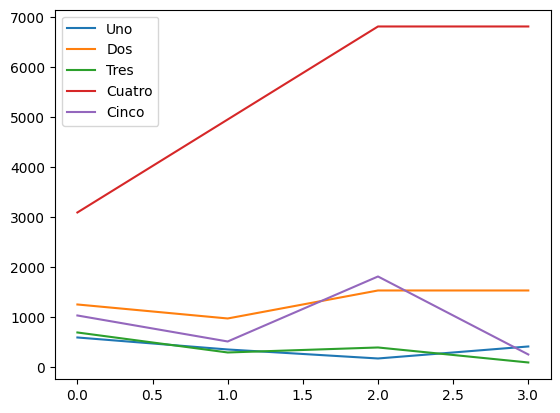

In [154]:
def filtrar(dataframe, limite_filtro):
    print(f'Antes de Filtrar hasta el {limite_filtro}')
    display(dataframe)
    
    return dataframe.loc[:limite_filtro]

def multiplicar(dataframe, valor):
    
    print(f'Antes de Multiplicar por {valor}')    
    display(dataframe)
    
    return dataframe * valor


def resaltar(dataframe, valor):
    
    print(f'Antes de Resaltar mayores a {valor}')
    display(dataframe)
    
    return dataframe.style.applymap(lambda x: 'background-color : yellow' if x > valor else '')
    
def graficar(dataframe):
    
    print('Antes de graficar')
    dataframe.plot()
    
    return dataframe

print('dataframe original')
display(df_estilo_colores)
print('dataframe con lambda aplicada que es duplicar')
df_estilo_colores.loc[0:10]\
                        .pipe(lambda pipe: pipe * 2)\
                        .pipe(filtrar, limite_filtro=3)\
                        .pipe(multiplicar, 10)\
                        .pipe(graficar)\
                        .pipe(resaltar, 500)

# <center>CONVERTIR DATOS CATEGORICOS O CADENAS A REPRESENTACION NUMERICA LabelEncoder **FACTORIZE**</center>

In [155]:
df_cat = df1.head(10)

display(df_cat)

# convierte los valores de la columna Anfibios a representacion numerica
display(pd.factorize(df_cat["Anfibios"]))
print()
# obtiene solo la representacion numerica
display(pd.factorize(df_cat["Anfibios"])[0])
# obtiene los indices originales que fueron convertidos a numericos
display(pd.factorize(df_cat["Anfibios"])[1])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


(array([0, 1, 2, 3, 4, 5, 4, 6, 7, 7], dtype=int64),
 Index(['Cecilias', 'Gallipatos', 'Ranas de Seychelles',
        'Salamandras gigantes chinas', 'Ranas de Darwin', 'Sapos gigantes',
        'Necturos', 'Proteos'],
       dtype='object'))

array([0, 1, 2, 3, 4, 5, 4, 6, 7, 7], dtype=int64)

Index(['Cecilias', 'Gallipatos', 'Ranas de Seychelles',
       'Salamandras gigantes chinas', 'Ranas de Darwin', 'Sapos gigantes',
       'Necturos', 'Proteos'],
      dtype='object')

In [156]:
indices_generados = list(pd.factorize(df_cat["Anfibios"])[0])
# elimina los indices duplicados, entonces no se puede usar pd.factorize(df_cat["Anfibios"])[1] para extraer los labels originales
indices_originales = list(df_cat.Anfibios)
pd.DataFrame({'indices_originales':indices_originales,'indices_generados':indices_generados})

,indices_originales,indices_generados
0,Cecilias,0
1,Gallipatos,1
2,Ranas de Seychelles,2
3,Salamandras gigantes chinas,3
4,Ranas de Darwin,4
5,Sapos gigantes,5
6,Ranas de Darwin,4
7,Necturos,6
8,Proteos,7
9,Proteos,7


# <center>**CONTAR VALORES NOT NULL DE UNA COLUMNA Y LISTAR LOS n VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

### <center>**LISTAR LOS n PRIMEROS VALORES REQUERIDOS Y LISTARLOS DE MAYOR A MENOR**</center>

In [163]:
df1\
    .Anfibios\
    .value_counts()\
    .to_frame()

,Anfibios
Lisorofios (extintos),9
Ranas de Seychelles,9
Salamandras sin pulmón,8
Ajolotes,7
Cecilias,7
Ranas de Darwin,7
Sapos gigantes,6
Necturos,5
Proteos,5
Ranas venenosas,5


In [157]:
df1\
    .Anfibios\
    .value_counts()\
    .head(3)\
    .to_frame()

,Anfibios
Lisorofios (extintos),9
Ranas de Seychelles,9
Salamandras sin pulmón,8


In [158]:
df1\
    .Anfibios\
    .value_counts()\
    .head(10)\
    .to_frame()

,Anfibios
Lisorofios (extintos),9
Ranas de Seychelles,9
Salamandras sin pulmón,8
Ajolotes,7
Cecilias,7
Ranas de Darwin,7
Sapos gigantes,6
Necturos,5
Proteos,5
Ranas venenosas,5


### <center>**LISTAR LOS n ULTIMOS VALORES REQUERIDOS Y LISTARLOS DE MAYOR A MENOR**</center>

In [159]:
df1\
    .Anfibios\
    .value_counts()\
    .tail(10)\
    .to_frame()

,Anfibios
Ranas arborícolas,5
Gallipatos,5
Ranas arcoíris,4
Sapos comunes,4
Sapos de caña venenosos,3
Salamandras gigantes chinas,3
Sapos corredores,3
Ranas toro africanas,2
Salamandras comunes,2
Microsaurios (extintos),1


### <center>**OBTENER LA LISTA CON LOS 'INDICES' VALORES DE LOS n PRIMEROS o ULTIMOS VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

In [160]:
df1\
    .Anfibios\
    .value_counts()\
    .head(10)\
    .index.\
    to_list()

['Lisorofios (extintos)',
 'Ranas de Seychelles',
 'Salamandras sin pulmón',
 'Ajolotes',
 'Cecilias',
 'Ranas de Darwin',
 'Sapos gigantes',
 'Necturos',
 'Proteos',
 'Ranas venenosas']

In [161]:
df1\
    .Anfibios\
    .value_counts()\
    .tail(10)\
    .index.\
    to_list()

['Ranas arborícolas',
 'Gallipatos',
 'Ranas arcoíris',
 'Sapos comunes',
 'Sapos de caña venenosos',
 'Salamandras gigantes chinas',
 'Sapos corredores',
 'Ranas toro africanas',
 'Salamandras comunes',
 'Microsaurios (extintos)']

### <center>**OBTENER LA LISTA CON LOS 'VALORES' DE LOS n PRIMEROS o ULTIMOS VALORES REQUERIDOS DE MAYOR A MENOR o DE MENOR A MAYOR**</center>

In [164]:
list(df1\
         .Anfibios\
         .value_counts()\
         .head(10)\
         .values
    )

[9, 9, 8, 7, 7, 7, 6, 5, 5, 5]

In [165]:
list(df1\
         .Anfibios\
         .value_counts()\
         .tail(10)\
         .values
    )

[5, 5, 4, 4, 3, 3, 3, 2, 2, 1]

### <center>**CONOCER EL TIPO DE DATOS DE CADA COLUMNA EN UN DATAFRAME Y ELIMINAR O SELECCIONAR LAS COLUMNAS BASADO EN EL TIPO DE DATO**</center>
<center><img src="pandas_data_types.png"/></center>

In [166]:
df1.dtypes

Id            int64
Lider         int64
Mamíferos    object
Reptiles     object
Peces        object
Anfibios     object
Aves         object
dtype: object

### CONVERTIR LAS COLUMNAS A UN TIPO DE DATO ESPECIFICO

In [168]:
df1.Peces = df1.Peces\
                    .astype("category")
    
df1['Id'] = df1.Id\
                    .astype("float")
df1.dtypes

Id            float64
Lider           int64
Mamíferos      object
Reptiles       object
Peces        category
Anfibios       object
Aves           object
dtype: object

### CONVERTIR LOS TIPOS DE DATOS GENERICOS A TIPO DE DATO CORRESPONDIENTE

In [169]:
df1 = df1\
        .convert_dtypes()
df1.dtypes

Id              Int64
Lider           Int64
Mamíferos      string
Reptiles       string
Peces        category
Anfibios       string
Aves           string
dtype: object

# Seleccionar solo las columnas con estos tipos de datos

In [170]:
df1\
    .select_dtypes(include=['int64'])\
    .columns.to_list()

['Id', 'Lider']

# Eliminar columnas con diferentes tipos de datos

In [171]:
df1\
    .select_dtypes(exclude=['int64'])\
    .columns.to_list()

['Mamíferos', 'Reptiles', 'Peces', 'Anfibios', 'Aves']

In [174]:
pd.DataFrame(df1, columns=df1\
    .select_dtypes(exclude=['int64'])\
    .columns.to_list())\
    .head()

,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


## <center>**GENERAR DATAFRAME Y PERSONALIZAR INDICES BASADOS EN COLUMNAS**</center>

In [177]:
dfx = df1
dfx.head()

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


# Indice Sencillo

In [178]:
from math import ceil

nombres_columnas = dfx.select_dtypes(exclude=['int64']).columns.to_list()
indice_aleatorio = random.choice(nombres_columnas)
multiples_indices_aleatorios = random.sample(nombres_columnas, ceil(len(nombres_columnas)/2))


dfx_1 = dfx\
            .set_index(indice_aleatorio)

print(f'indice_aleatorio -> {indice_aleatorio}')
print(f'multiples_indices_aleatorios -> {multiples_indices_aleatorios}')
dfx_1.head()

indice_aleatorio -> Reptiles
multiples_indices_aleatorios -> ['Peces', 'Aves', 'Reptiles']


,Id,Lider,Mamíferos,Peces,Anfibios,Aves
Reptiles,,,,,,
Lagartos voladores australianos,1,42,Vacas,Koi japoneses,Cecilias,Guacamayas
Camaleones,2,32,Chimpancés,Atunes,Gallipatos,Loros
Cocodrilos,3,41,Leones,Carpas,Ranas de Seychelles,Buitres
Lagartijas comunes,4,94,Vacas,Koi japoneses,Salamandras gigantes chinas,Pelícanos
Iguanas,5,14,Ratones,Celacantos (extintos),Ranas de Darwin,Tucanes


# Indice Multiple

In [179]:
#init_notebook_mode(all_interactive=False)
print(f'multiples_indices_aleatorios -> {multiples_indices_aleatorios}')


dfx_2 = dfx\
            .set_index(multiples_indices_aleatorios)\
            .sort_values(multiples_indices_aleatorios)
dfx_2

multiples_indices_aleatorios -> ['Peces', 'Aves', 'Reptiles']


Id  \
Peces                 Aves                Reptiles                               
Anguilas de mar       Buitres             Iguanas                           50   
                      Lechuzas            Luciones                          27   
                      Pavos               Iguanas                           29   
                      Águilas             Lagartijas comunes                 9   
Atunes                Faisanes            Cocodrilos                        46   
                      Gaviotas            Lagartijas comunes                44   
                      Lechuzas            Lagartijas comunes                22   
                      Loros               Camaleones                         2   
                      Pavorreales         Camaleones                        79   
Bacalaos              Cigüeñas            Camaleones                        52   
                      Faisanes            Lagartos voladores australianos   76   
                      Loros               Boas constrictoras                23   
                      Pájaros carpinteros Lagartos voladores australianos   32   
Barracudas            Avestruces          Víboras                           12   
                      Faisanes            Tortugas acuáticas                60   
                      Guacamayas          Lagartijas comunes                47   
                      Lechuzas            Luciones                           7   
                      Patos               Aligátores                        90   
                      Pavos               Basiliscos                        91   
                      Pelícanos           Iguanas                           75   
                                          Mosasaurios (extintos)            81   
                                          Tuátaras de Nueva Zelanda         30   
Carpas                Buitres             Cocodrilos                         3   
                      Colibríes           Cocodrilos                        13   
                      Cóndores            Tortugas galápagos                36   
                      Gaviotas            Dragones de Komodo                11   
                                          Tortugas terrestres               10   
                      Lechuzas            Tortugas galápagos                 8   
                      Pájaros carpinteros Pterosaurios (extintos)           68   
Celacantos (extintos) Loros               Mosasaurios (extintos)            86   
                      Pavorreales         Aligátores                        85   
                      Tucanes             Iguanas                            5   
Esturiones            Avestruces          Dinosaurios (extintos)            72   
                                          Tuátaras de Nueva Zelanda         15   
                      Cigüeñas            Aligátores                        20   
                      Faisanes            Camaleones                        63   
                      Loros               Tortugas galápagos                53   
                      Patos               Cocodrilos                        55   
                      Pavos               Tortugas terrestres               61   
Koi japoneses         Canarios            Basiliscos                        73   
                      Guacamayas          Lagartos voladores australianos    1   
                      Loros               Lagartijas comunes                88   
                      Pavos               Pterosaurios (extintos)           70   
                      Pelícanos           Lagartijas comunes                 4   
                      Tucanes             Boas constrictoras                71   
Las agujas de río     Buitres             Camaleones                        34   
                      Cigüeñas            Tortugas acuáticas                41   
                      Loros               Dragones de Komo

In [180]:
def extraer_los_elementos_de_una_posicion_especifica_de_una_lista_de_tuplas(dataset, posicion_especifica=0):
    
    listado_de_indices = dataset.index.to_list()
    indices_principales = list(set(list(zip(*listado_de_indices))[posicion_especifica]))
    
    return indices_principales

# obtiene el listado con los valores del primer indice
print(extraer_los_elementos_de_una_posicion_especifica_de_una_lista_de_tuplas(dfx_2, posicion_especifica=0))

['Pirañas', 'Peces sapo', 'Tiburones', 'Anguilas de mar', 'Peces globo', 'Koi japoneses', 'Esturiones', 'Bacalaos', 'Barracudas', 'Carpas', 'Los tiburones ballena', 'Celacantos (extintos)', 'Peces abisales', 'Atunes', 'Peces luna', 'Peces payaso', 'Peces vela', 'Lenguados', 'Las agujas de río', 'Peces espada']


## <center>CONSULTAR RAPIDA BASADA EN INDICES CON **XS CROSS SECTION** BASADO EN EL ORDEN Y LOS VALORES DE LOS INDICES</center>

In [211]:
def listar_elementos_por_indice_sin_repetir(dataset):
    
    columnas_dataset = dataset.columns.to_list()
    
    # obtiene la lista con el contenido de una de las columnas de dataframe ya que es aleatoria la seleccion
    indices_aleatorios = list(dataset.to_dict()[random.choice(columnas_dataset)].keys())
    
    # selecciona una tupla aleatoria y se toman como referencia para la busqueda con los indices
    return random.choice(indices_aleatorios)
   
# nombres de los valores dentro de los indices con que se va a filtrar
consultar_valor_indice_0, consultar_valor_indice_1, consultar_valor_indice_2 = listar_elementos_por_indice_sin_repetir(dfx_2)

# nombres de las indices que tiene el dataframe
nombre_indice_0, nombre_indice_1, nombre_indice_2 = tuple(multiples_indices_aleatorios)

display(dfx_2)

valor_indices = f'multiples_indices_aleatorios = {multiples_indices_aleatorios}\
                                                                                nombre_indice_0 = {nombre_indice_0} , nombre_indice_1 = {nombre_indice_1}, nombre_indice_2 = {nombre_indice_2}\
                                                                                consultar_valor_indice_0 = {consultar_valor_indice_0}, consultar_valor_indice_1 = {consultar_valor_indice_1}, consultar_valor_indice_2 = {consultar_valor_indice_2}'

Id  \
Peces                 Aves                Reptiles                               
Anguilas de mar       Buitres             Iguanas                           50   
                      Lechuzas            Luciones                          27   
                      Pavos               Iguanas                           29   
                      Águilas             Lagartijas comunes                 9   
Atunes                Faisanes            Cocodrilos                        46   
                      Gaviotas            Lagartijas comunes                44   
                      Lechuzas            Lagartijas comunes                22   
                      Loros               Camaleones                         2   
                      Pavorreales         Camaleones                        79   
Bacalaos              Cigüeñas            Camaleones                        52   
                      Faisanes            Lagartos voladores australianos   76   
                      Loros               Boas constrictoras                23   
                      Pájaros carpinteros Lagartos voladores australianos   32   
Barracudas            Avestruces          Víboras                           12   
                      Faisanes            Tortugas acuáticas                60   
                      Guacamayas          Lagartijas comunes                47   
                      Lechuzas            Luciones                           7   
                      Patos               Aligátores                        90   
                      Pavos               Basiliscos                        91   
                      Pelícanos           Iguanas                           75   
                                          Mosasaurios (extintos)            81   
                                          Tuátaras de Nueva Zelanda         30   
Carpas                Buitres             Cocodrilos                         3   
                      Colibríes           Cocodrilos                        13   
                      Cóndores            Tortugas galápagos                36   
                      Gaviotas            Dragones de Komodo                11   
                                          Tortugas terrestres               10   
                      Lechuzas            Tortugas galápagos                 8   
                      Pájaros carpinteros Pterosaurios (extintos)           68   
Celacantos (extintos) Loros               Mosasaurios (extintos)            86   
                      Pavorreales         Aligátores                        85   
                      Tucanes             Iguanas                            5   
Esturiones            Avestruces          Dinosaurios (extintos)            72   
                                          Tuátaras de Nueva Zelanda         15   
                      Cigüeñas            Aligátores                        20   
                      Faisanes            Camaleones                        63   
                      Loros               Tortugas galápagos                53   
                      Patos               Cocodrilos                        55   
                      Pavos               Tortugas terrestres               61   
Koi japoneses         Canarios            Basiliscos                        73   
                      Guacamayas          Lagartos voladores australianos    1   
                      Loros               Lagartijas comunes                88   
                      Pavos               Pterosaurios (extintos)           70   
                      Pelícanos           Lagartijas comunes                 4   
                      Tucanes             Boas constrictoras                71   
Las agujas de río     Buitres             Camaleones                        34   
                      Cigüeñas            Tortugas acuáticas                41   
                      Loros               Dragones de Komo

In [212]:
print(valor_indices)

# doble parentesis
dfx_2\
    .xs((consultar_valor_indice_0))

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,,Id,Lider,Mamíferos,Anfibios
Aves,Reptiles,,,,
Canarios,Basiliscos,73,91,Rinocerontes,Ranas arcoíris
Guacamayas,Lagartos voladores australianos,1,42,Vacas,Cecilias
Loros,Lagartijas comunes,88,100,Ovejas,Ranas de Seychelles
Pavos,Pterosaurios (extintos),70,67,Caballos,Lisorofios (extintos)
Pelícanos,Lagartijas comunes,4,94,Vacas,Salamandras gigantes chinas
Tucanes,Boas constrictoras,71,94,Ovejas,Sapos comunes


In [213]:
print(valor_indices)
# usando el nombre del parametro
dfx_2\
    .xs(key = consultar_valor_indice_0)

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,,Id,Lider,Mamíferos,Anfibios
Aves,Reptiles,,,,
Canarios,Basiliscos,73,91,Rinocerontes,Ranas arcoíris
Guacamayas,Lagartos voladores australianos,1,42,Vacas,Cecilias
Loros,Lagartijas comunes,88,100,Ovejas,Ranas de Seychelles
Pavos,Pterosaurios (extintos),70,67,Caballos,Lisorofios (extintos)
Pelícanos,Lagartijas comunes,4,94,Vacas,Salamandras gigantes chinas
Tucanes,Boas constrictoras,71,94,Ovejas,Sapos comunes


# CONSULTA MULTI INDICE

In [214]:
print(valor_indices)
dfx_2\
    .xs(key =(consultar_valor_indice_0, consultar_valor_indice_1))

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,Id,Lider,Mamíferos,Anfibios
Reptiles,,,,
Lagartijas comunes,88,100,Ovejas,Ranas de Seychelles


In [215]:
# debe respetarse el orden de los indices sino genera una excepcion
dfx_2\
    .xs(key =(consultar_valor_indice_1, consultar_valor_indice_0))

KeyError: ('Loros', 'Koi japoneses')

## <center>ACCESO POR NIVEL DE LOS INDICES</center>

In [217]:
columnas_ordenamiento = random.sample(dfx_2.columns.to_list(), ceil(len(dfx_2.columns.to_list())/2))
print(columnas_ordenamiento)
print(valor_indices)

dfx_2\
    .sort_values(columnas_ordenamiento)

['Mamíferos', 'Lider']
multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


Id  \
Peces                 Aves                Reptiles                               
Peces vela            Loros               Víboras                           89   
Carpas                Cóndores            Tortugas galápagos                36   
Atunes                Lechuzas            Lagartijas comunes                22   
                      Gaviotas            Lagartijas comunes                44   
Carpas                Pájaros carpinteros Pterosaurios (extintos)           68   
Lenguados             Cigüeñas            Mosasaurios (extintos)            96   
Anguilas de mar       Águilas             Lagartijas comunes                 9   
Carpas                Lechuzas            Tortugas galápagos                 8   
Peces abisales        Gallinas            Luciones                         100   
Lenguados             Faisanes            Víboras                           56   
                      Águilas             Boas constrictoras                51   
Peces vela            Cigüeñas            Monstruos de Gila                 40   
Koi japoneses         Pavos               Pterosaurios (extintos)           70   
Peces sapo            Canarios            Tuátaras de Nueva Zelanda         99   
Peces vela            Cuervos             Tuátaras de Nueva Zelanda         38   
Esturiones            Avestruces          Tuátaras de Nueva Zelanda         15   
Barracudas            Pelícanos           Tuátaras de Nueva Zelanda         30   
Bacalaos              Pájaros carpinteros Lagartos voladores australianos   32   
Peces abisales        Avestruces          Cocodrilos                        98   
Barracudas            Guacamayas          Lagartijas comunes                47   
Los tiburones ballena Patos               Tortugas terrestres               65   
Atunes                Faisanes            Cocodrilos                        46   
Las agujas de río     Buitres             Camaleones                        34   
Anguilas de mar       Buitres             Iguanas                           50   
Bacalaos              Faisanes            Lagartos voladores australianos   76   
Peces globo           Colibríes           Monstruos de Gila                 94   
Atunes                Loros               Camaleones                         2   
Peces espada          Pelícanos           Víboras                           58   
Pirañas               Cigüeñas            Tortugas acuáticas                92   
Barracudas            Avestruces          Víboras                           12   
Tiburones             Gaviotas            Tortugas terrestres               69   
                      Avestruces          Aligátores                        59   
Peces abisales        Lechuzas            Aligátores                        35   
Anguilas de mar       Lechuzas            Luciones                          27   
                      Pavos               Iguanas                           29   
Peces payaso          Tucanes             Boas constrictoras                17   
Pirañas               Guacamayas          Aligátores                        84   
Peces espada          Avestruces          Luciones                          21   
Peces payaso          Lechuzas            Monstruos de Gila                 67   
                      Águilas             Dinosaurios (extintos)            14   
Peces globo           Avestruces          Mosasaurios (extintos)            48   
                      Cuervos             Tortugas acuáticas                77   
Lenguados             Loros               Monstruos de Gila                 83   
Esturiones            Faisanes            Camaleones                        63   
Peces payaso          Pavos               Iguanas                            6   
Los tiburones ballena Loros               Luciones                          25   
Peces abisales        Guacamayas          Tortugas acuáticas                49   
Lenguados             Águilas             Cocodrilos      

## Ubicacion del indice en el dataframe

In [218]:
print(valor_indices)

# trae la info asociada al valor declarado del indice 2 de la lista, 
# por eso el 'level' debe ser igual a la ubicacion del indice
dfx_2\
    .xs(consultar_valor_indice_2 , level=2)

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


Id  Lider Mamíferos                     Anfibios
Peces           Aves                                                        
Anguilas de mar Águilas      9    100  Ballenas                      Proteos
Atunes          Gaviotas    44     49  Ballenas                     Necturos
                Lechuzas    22     24  Ballenas            Ranas arborícolas
Barracudas      Guacamayas  47     66  Canguros               Sapos gigantes
Koi japoneses   Loros       88    100    Ovejas          Ranas de Seychelles
                Pelícanos    4     94     Vacas  Salamandras gigantes chinas

In [219]:
print(valor_indices)

dfx_2\
    .xs((consultar_valor_indice_2 ,consultar_valor_indice_0), level=[2,0])

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,Id,Lider,Mamíferos,Anfibios
Aves,,,,
Loros,88,100,Ovejas,Ranas de Seychelles
Pelícanos,4,94,Vacas,Salamandras gigantes chinas


## ubicacion o nombres del indice en el dataframe

In [220]:
print(valor_indices)

dfx_2\
    .xs((consultar_valor_indice_2, consultar_valor_indice_0), level=[2,nombre_indice_0])

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,Id,Lider,Mamíferos,Anfibios
Aves,,,,
Loros,88,100,Ovejas,Ranas de Seychelles
Pelícanos,4,94,Vacas,Salamandras gigantes chinas


In [221]:
print(valor_indices)

dfx_2\
    .xs((consultar_valor_indice_0,consultar_valor_indice_2), level=[nombre_indice_0, nombre_indice_2])

multiples_indices_aleatorios = ['Peces', 'Aves', 'Reptiles']                                                                                nombre_indice_0 = Peces , nombre_indice_1 = Aves, nombre_indice_2 = Reptiles                                                                                consultar_valor_indice_0 = Koi japoneses, consultar_valor_indice_1 = Loros, consultar_valor_indice_2 = Lagartijas comunes


,Id,Lider,Mamíferos,Anfibios
Aves,,,,
Loros,88,100,Ovejas,Ranas de Seychelles
Pelícanos,4,94,Vacas,Salamandras gigantes chinas


## <center>MANTENER LOS INDICES Y FILTRAR SOLO LA COLUMNA DE INTERES Y CONVERTIR LA SERIE A DATAFRAME</center>

In [228]:
# se debe declarar el eje de filtrado
dfx_2\
    .xs('Id', axis=1).to_frame()

Id
Peces                 Aves                Reptiles                            
Anguilas de mar       Buitres             Iguanas                           50
                      Lechuzas            Luciones                          27
                      Pavos               Iguanas                           29
                      Águilas             Lagartijas comunes                 9
Atunes                Faisanes            Cocodrilos                        46
                      Gaviotas            Lagartijas comunes                44
                      Lechuzas            Lagartijas comunes                22
                      Loros               Camaleones                         2
                      Pavorreales         Camaleones                        79
Bacalaos              Cigüeñas            Camaleones                        52
                      Faisanes            Lagartos voladores australianos   76
                      Loros               Boas constrictoras                23
                      Pájaros carpinteros Lagartos voladores australianos   32
Barracudas            Avestruces          Víboras                           12
                      Faisanes            Tortugas acuáticas                60
                      Guacamayas          Lagartijas comunes                47
                      Lechuzas            Luciones                           7
                      Patos               Aligátores                        90
                      Pavos               Basiliscos                        91
                      Pelícanos           Iguanas                           75
                                          Mosasaurios (extintos)            81
                                          Tuátaras de Nueva Zelanda         30
Carpas                Buitres             Cocodrilos                         3
                      Colibríes           Cocodrilos                        13
                      Cóndores            Tortugas galápagos                36
                      Gaviotas            Dragones de Komodo                11
                                          Tortugas terrestres               10
                      Lechuzas            Tortugas galápagos                 8
                      Pájaros carpinteros Pterosaurios (extintos)           68
Celacantos (extintos) Loros               Mosasaurios (extintos)            86
                      Pavorreales         Aligátores                        85
                      Tucanes             Iguanas                            5
Esturiones            Avestruces          Dinosaurios (extintos)            72
                                          Tuátaras de Nueva Zelanda         15
                      Cigüeñas            Aligátores                        20
                      Faisanes            Camaleones                        63
                      Loros               Tortugas galápagos                53
                      Patos               Cocodrilos                        55
                      Pavos               Tortugas terrestres               61
Koi japoneses         Canarios            Basiliscos                        73
                      Guacamayas          Lagartos voladores australianos    1
                      Loros               Lagartijas comunes                88
                      Pavos               Pterosaurios (extintos)           70
                      Pelícanos           Lagartijas comunes                 4
                      Tucanes             Boas constrictoras                71
Las agujas de río     Buitres             Camaleones                        34
                      Cigüeñas            Tortugas acuáticas                41
                      Loros               Dragones de Komodo                64
Lenguados             Buitres             Lagartos voladores australianos   62
                      Cigüeñas            Mosas

In [226]:
display(dfx_2\
            .xs('Lider', axis=1)\
            .to_frame())

Lider
Peces                 Aves                Reptiles                              
Anguilas de mar       Buitres             Iguanas                             34
                      Lechuzas            Luciones                            82
                      Pavos               Iguanas                              5
                      Águilas             Lagartijas comunes                 100
Atunes                Faisanes            Cocodrilos                          94
                      Gaviotas            Lagartijas comunes                  49
                      Lechuzas            Lagartijas comunes                  24
                      Loros               Camaleones                          32
                      Pavorreales         Camaleones                         101
Bacalaos              Cigüeñas            Camaleones                          75
                      Faisanes            Lagartos voladores australianos     15
                      Loros               Boas constrictoras                  97
                      Pájaros carpinteros Lagartos voladores australianos    101
Barracudas            Avestruces          Víboras                             90
                      Faisanes            Tortugas acuáticas                  34
                      Guacamayas          Lagartijas comunes                  66
                      Lechuzas            Luciones                            36
                      Patos               Aligátores                          87
                      Pavos               Basiliscos                          16
                      Pelícanos           Iguanas                             25
                                          Mosasaurios (extintos)              44
                                          Tuátaras de Nueva Zelanda           91
Carpas                Buitres             Cocodrilos                          41
                      Colibríes           Cocodrilos                          17
                      Cóndores            Tortugas galápagos                  17
                      Gaviotas            Dragones de Komodo                  99
                                          Tortugas terrestres                 93
                      Lechuzas            Tortugas galápagos                   7
                      Pájaros carpinteros Pterosaurios (extintos)             50
Celacantos (extintos) Loros               Mosasaurios (extintos)              63
                      Pavorreales         Aligátores                          79
                      Tucanes             Iguanas                             14
Esturiones            Avestruces          Dinosaurios (extintos)             101
                                          Tuátaras de Nueva Zelanda           39
                      Cigüeñas            Aligátores                          77
                      Faisanes            Camaleones                           8
                      Loros               Tortugas galápagos                  60
                      Patos               Cocodrilos                          92
                      Pavos               Tortugas terrestres                 70
Koi japoneses         Canarios            Basiliscos                          91
                      Guacamayas          Lagartos voladores australianos     42
                      Loros               Lagartijas comunes                 100
                      Pavos               Pterosaurios (extintos)             67
                      Pelícanos           Lagartijas comunes                  94
                      Tucanes             Boas constrictoras                  94
Las agujas de río     Buitres             Camaleones                          18
                      Cigüeñas            Tortugas acuáticas                  61
                      Loros               Dragones de Komodo                  43
Lenguados             Bui

# RECUPERAR O CONVERTIR UN DATASET CON INDICES EN FORMA TABULAR DEL DATASET **RESET INDEX**

In [229]:
display(dfx_2.reset_index())
del dfx_2
del dfx_1
garbage_colector.collect(), garbage_colector.get_threshold()

,Peces,Aves,Reptiles,Id,Lider,Mamíferos,Anfibios
0,Anguilas de mar,Buitres,Iguanas,50,34,Capibaras,Ranas de Darwin
1,Anguilas de mar,Lechuzas,Luciones,27,82,Delfines,Salamandras sin pulmón
2,Anguilas de mar,Pavos,Iguanas,29,5,Elefantes,Salamandras sin pulmón
3,Anguilas de mar,Águilas,Lagartijas comunes,9,100,Ballenas,Proteos
4,Atunes,Faisanes,Cocodrilos,46,94,Canguros,Sapos de caña venenosos
5,Atunes,Gaviotas,Lagartijas comunes,44,49,Ballenas,Necturos
6,Atunes,Lechuzas,Lagartijas comunes,22,24,Ballenas,Ranas arborícolas
7,Atunes,Loros,Camaleones,2,32,Chimpancés,Gallipatos
8,Atunes,Pavorreales,Camaleones,79,101,Ratones,Sapos corredores
9,Bacalaos,Cigüeñas,Camaleones,52,75,Jirafas,Sapos corredores


(9245, (700, 10, 10))

# <center>**CONTAR VALORES NULL DE UN DATAFRAME**</center>

## <center>**AGRUPADO POR COLUMNAS NULL DE UN DATAFRAME**</center>

In [236]:
display(df_colores)
df_colores\
            .isna()\
            .sum()\
            .to_frame()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


,0
AMARILLO,4
AZUL,5
ROJO,3
VERDE,9
ROSADO,0


## <center>**TOTAL DE TODAS LAS FILAS Y COLUMNAS NULL DE UN DATAFRAME**</center>

In [231]:
df_colores\
            .isna()\
            .sum()\
            .sum()

21

### <center>**reset_index PARA PERSONALIZAR EL NOMBRE DE COLUMNA QUE AGRUPA EL RESULTADO**</center>

In [232]:
df_colores.\
            isna()\
            .sum()\
            .reset_index()\
            .rename({0:'Total Valores Nulos'}, axis='columns')

,index,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


In [233]:
df_colores\
            .isna()\
            .sum()\
            .reset_index(name ='Total Valores Nulos')

,index,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


### <center>**PERSONALIZAR NOMBRE DEL INDICE dataframe.index.name**</center>

In [234]:
indice_personalizado = df_colores\
                                .isna()\
                                .sum()

indice_personalizado.index.name = 'Colores'
indice_personalizado.reset_index(name ='Total Valores Nulos')

,Colores,Total Valores Nulos
0,AMARILLO,4
1,AZUL,5
2,ROJO,3
3,VERDE,9
4,ROSADO,0


# <center>**CONTAR VALORES NULL Y NOT NULL DE UNA COLUMNA**</center>

In [237]:
df_colores.AMARILLO

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
5    3.0
6    4.0
7    NaN
8    NaN
9    1.0
Name: AMARILLO, dtype: float64

In [238]:
df_colores.AMARILLO.isna().value_counts()

False    6
True     4
Name: AMARILLO, dtype: int64

In [239]:
df_colores.AMARILLO.value_counts()

1.0    2
3.0    2
2.0    1
4.0    1
Name: AMARILLO, dtype: int64

## <center>**ELIMINA TODAS LAS FILAS CON AL MENOS UN VALOR NULL**</center>

In [240]:
display(df_colores)
df_colores.dropna()

,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3
1,NaN,NaN,NaN,NaN,6
2,2.0,NaN,5.0,NaN,9
3,3.0,NaN,10.0,NaN,12
4,NaN,NaN,15.0,NaN,15
5,3.0,10.0,20.0,NaN,18
6,4.0,15.0,7.0,NaN,21
7,NaN,20.0,31.0,NaN,24
8,NaN,25.0,NaN,NaN,27
9,1.0,NaN,NaN,NaN,30


,AMARILLO,AZUL,ROJO,VERDE,ROSADO
0,1.0,5.0,2.0,4.0,3


## <center>**ELIMINA TODAS LAS COLUMNAS CON AL MENOS UN VALOR NULL**</center>

In [241]:
df_colores.T

,0,1,2,3,4,5,6,7,8,9
AMARILLO,1.0,NaN,2.0,3.0,NaN,3.0,4.0,NaN,NaN,1.0
AZUL,5.0,NaN,NaN,NaN,NaN,10.0,15.0,20.0,25.0,NaN
ROJO,2.0,NaN,5.0,10.0,15.0,20.0,7.0,31.0,NaN,NaN
VERDE,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ROSADO,3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0,27.0,30.0


In [242]:
df_colores.T.dropna().T

,ROSADO
0,3.0
1,6.0
2,9.0
3,12.0
4,15.0
5,18.0
6,21.0
7,24.0
8,27.0
9,30.0


# <center>**OBTENER DATAFRAME FILTRADO CON MULTIPLES COLUMNAS**</center>

In [243]:
# corchete sencillo genera una serie,
df1['Id']

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
30     31
31     32
32     33
33     34
34     35
35     36
36     37
37     38
38     39
39     40
40     41
41     42
42     43
43     44
44     45
45     46
46     47
47     48
48     49
49     50
50     51
51     52
52     53
53     54
54     55
55     56
56     57
57     58
58     59
59     60
60     61
61     62
62     63
63     64
64     65
65     66
66     67
67     68
68     69
69     70
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100


In [244]:
# con to_frame() lo convierte a dataframe
df1['Id'].to_frame()

,Id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [245]:
# docble corchete para dataframe
df1[['Id']]

,Id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [246]:
df1[['Id','Lider']]

,Id,Lider
0,1,42
1,2,32
2,3,41
3,4,94
4,5,14
5,6,32
6,7,36
7,8,7
8,9,100
9,10,93


# <center>ADICIONAR **FILAS NUEVAS** A UN DATAFRAME</center>

### <center>**USANDO APPEND DICCIONARIO**</center>

In [247]:
dataframe_to_filter = df2.head()
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga


In [248]:
# no puede tener columnas con el mismo nombre
diccionario = dataframe_to_filter\
                                .loc[3]\
                                .to_dict()

print(diccionario)
dataframe_to_filter.append(diccionario, ignore_index=True)

{'Id': 4, 'Lider': 79, 'Vertebrados': 'Sapos gigantes', 'Invertebrados': 'Mariposa saltacercas', 'Ovíparos': 'Paloma', 'Frugívoros': 'Lémur', 'Rumiantes': 'Sitatunga'}


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga


In [251]:
e = [1,2,3]
f = [0,5,7]
e.append(f)
e

[1, 2, 3, [0, 5, 7]]

### <center>**LISTA DE DICCIONARIOS**</center>

In [252]:
lista_diccionarios = [dataframe_to_filter.loc[1].to_dict(),\
                      dataframe_to_filter.loc[2].to_dict(),\
                      dataframe_to_filter.loc[3].to_dict()]
dataframe_to_filter.append(lista_diccionarios, ignore_index=True)

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
5,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
6,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
7,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga


### <center>**DECLARANDO Y CREANDO UN NOMBRE O VALOR DE INDICE ESPECIFICO COMO VALOR DE LA FILA**</center>

In [253]:
dataframe_to_filter.loc[0.5] = [chr(valor + 64) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter.loc[0.7] = [chr(valor + 84) for valor in range(dataframe_to_filter.shape[1])]
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
0.5,@,A,B,C,D,E,F
0.7,T,U,V,W,X,Y,Z


### <center>**USANDO EL INDICE EN LA ULTIMA POSICION PARA INSERTAR LA FILA**</center>

In [254]:
# calcula la ultima posicion conociendo el tamano del dataframe len(dataframe_to_filter)
lista_a_insertar = [chr(valor + 104) for valor in range(dataframe_to_filter.shape[1])]
print(lista_a_insertar)

# len(dataframe_to_filter) OBTIENE EL TAMANO DEL DATAFRAME PARA UBIRCARLO EN LA ULTIMA POSICION
dataframe_to_filter.loc[len(dataframe_to_filter)] = lista_a_insertar
dataframe_to_filter = dataframe_to_filter.sort_index(ascending=True)
dataframe_to_filter

['h', 'i', 'j', 'k', 'l', 'm', 'n']


,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete
0.5,@,A,B,C,D,E,F
0.7,T,U,V,W,X,Y,Z
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga
7.0,h,i,j,k,l,m,n


# <center>ADICIONAR **NUEVAS COLUMNAS** A UN DATAFRAME</center>

In [255]:
# se adicionan como la ultima columna
dataframe_to_filter['nueva columna'] = [chr(valor + 33) for valor in range (dataframe_to_filter.shape[0])]
dataframe_to_filter

,Id,Lider,Vertebrados,Invertebrados,Ovíparos,Frugívoros,Rumiantes,nueva columna
0.0,1,96,Sapos de caña venenosos,Moscas cernícalo,Hornero,Bonobo,Ciervo de copete,!
0.5,@,A,B,C,D,E,F,""""
0.7,T,U,V,W,X,Y,Z,#
1.0,2,67,Jirafas,Hormigas,Ganso,Tapir,Bisonte estepario,$
2.0,3,5,Tucanes,Avispa scolia,Gallina,Perico,Vicuña,%
3.0,4,79,Sapos gigantes,Mariposa saltacercas,Paloma,Lémur,Sitatunga,&
4.0,5,68,Dragones de Komodo,Pulgones,Salmón,Tucán,Sitatunga,'
7.0,h,i,j,k,l,m,n,(


## <center>**ASSIGN** ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

### <center>**LAMBDA**</center>

In [256]:
df3.assign(temporal=lambda x: x.Id * x.Lider)

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,temporal
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,60
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,16
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí,75
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,12
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,190
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,600
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,21
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,496
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,342
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,790


### <center>**MULTPLES LAMBDA O COLUMNAS DEL DATAFRAME**</center>

In [257]:
df3.Carnívoros.to_frame()

,Carnívoros
0,Comadreja
1,Boa
2,Marabú
3,Kinkajú
4,Pantera negra
5,Gato montés
6,Tigre siberiano
7,Lobo gris
8,Piraña
9,Nutria


In [258]:
def unir(row):
    
    return row.Mamíferos + ' y ' + row.Ovíparos
    

df3.assign(temporal_multiple=lambda x: x.Id * x.Lider, mamiferos_oviparos=unir, hervi_carnivoros= df3.Herbívoros + ' ' + df3.Carnívoros)

,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,temporal_multiple,mamiferos_oviparos,hervi_carnivoros
0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,60,Chimpancés y Víbora de cascabel,Cebra Comadreja
1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,16,Rinocerontes y Guacamayo,Elefante Boa
2,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí,75,Caballos y Gallina,Ciervo Marabú
3,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,12,Gorilas y Avestruz,Burro Kinkajú
4,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,190,Elefantes y Gorrión,Canguro Pantera negra
5,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,600,Capibaras y Pato,Cebra Gato montés
6,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,21,Jirafas y Salmón,Canguro Tigre siberiano
7,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,496,Elefantes y Pingüino,Cebra Lobo gris
8,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,342,Orcas y Paloma,Rinoceronte Piraña
9,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,790,Seres humanos y Codorniz,Tapir Nutria


### <center>**INSERT COLUMNA DATAFRAME EN LA UBICACION QUE SE QUIERA DE MANERA PERMANENTE**</center>

In [259]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

,insertada,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,4,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,9,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,16,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,25,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,36,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,49,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,64,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,81,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


### <center>**NO SE INSERTA UNA NUEVA COLUMNA EN EL DATAFRAME CON EL MISMO NOMBRE SI NO SE ESPECIFICA LA OPCION DE DUPLICADO**</center>

In [260]:
df3.insert(0, "insertada", [valor*valor for valor in range(df3.shape[0])])
df3

ValueError: cannot insert insertada, already exists

In [261]:
df3.insert(0, "insertada", [valor*valor*valor + 5 for valor in range(df3.shape[0])], allow_duplicates=True)
df3

,insertada,insertada,Id,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,5,0,1,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,6,1,2,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,13,4,3,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,32,9,4,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,69,16,5,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,130,25,6,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,221,36,7,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,348,49,8,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,517,64,9,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,734,81,10,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


In [262]:
df3.insert(3, "insertada", [valor*valor*valor + 5 for valor in range(df3.shape[0])], allow_duplicates=True)
df3

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo
5,130,25,6,130,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé
6,221,36,7,221,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo
7,348,49,8,348,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono
8,517,64,9,517,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña
9,734,81,10,734,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo


### <center>ADICIONA COLUMNA EN LA ULTIMA POSICION</center>

In [263]:
df3.insert(df3.shape[1], "ULTIMA POSICION", df3.Carnívoros + ' ' + df3.Omnívoros, allow_duplicates=True)
df3

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,ULTIMA POSICION
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,Comadreja Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,Boa Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí,Marabú Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,Kinkajú Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,Pantera negra Erizo
5,130,25,6,130,100,Capibaras,Pato,Cebra,Gato montés,Chimpancé,Gato montés Chimpancé
6,221,36,7,221,3,Jirafas,Salmón,Canguro,Tigre siberiano,Cerdo,Tigre siberiano Cerdo
7,348,49,8,348,62,Elefantes,Pingüino,Cebra,Lobo gris,Mono,Lobo gris Mono
8,517,64,9,517,38,Orcas,Paloma,Rinoceronte,Piraña,Piraña,Piraña Piraña
9,734,81,10,734,79,Seres humanos,Codorniz,Tapir,Nutria,Grajo,Nutria Grajo


# <center>**CREAR DATAFRAME DE OTRO DATAFRAME**</center>

### <center>**NO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS**</center>

In [264]:
display(df3.head())
pd.DataFrame(df3, columns=['Id','Lider'])

,insertada,insertada,Id,insertada,Lider,Mamíferos,Ovíparos,Herbívoros,Carnívoros,Omnívoros,ULTIMA POSICION
0,5,0,1,5,60,Chimpancés,Víbora de cascabel,Cebra,Comadreja,Zorzal,Comadreja Zorzal
1,6,1,2,6,8,Rinocerontes,Guacamayo,Elefante,Boa,Tiburón,Boa Tiburón
2,13,4,3,13,25,Caballos,Gallina,Ciervo,Marabú,Manatí,Marabú Manatí
3,32,9,4,32,3,Gorilas,Avestruz,Burro,Kinkajú,Nutria,Kinkajú Nutria
4,69,16,5,69,38,Elefantes,Gorrión,Canguro,Pantera negra,Erizo,Pantera negra Erizo


ValueError: cannot reindex on an axis with duplicate labels

In [265]:
pd.DataFrame(df2, columns=['Id','Lider']).head()

,Id,Lider
0,1,96
1,2,67
2,3,5
3,4,79
4,5,68


### <center>**SOLO SE PUEDE CREAR UN NUEVO DATAFRAME DE OTRO DATAFRAME SI TIENE COLUMNAS REPETIDAS USANDO DOBLE CORCHETE**</center>

In [266]:
pd.DataFrame(df3[['insertada','Lider']]).head()

,insertada,insertada,insertada,Lider
0,5,0,5,60
1,6,1,6,8
2,13,4,13,25
3,32,9,32,3
4,69,16,69,38


# <center>**ORDENAR DATAFRAME BASADO EN LOS VALORES DE COLUMNAS**</center>

### de mayor a menor valor

In [267]:
df1.sort_values(by=['Lider','Id'], ascending=True)[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
28,29,5,Elefantes,Iguanas,Anguilas de mar,Salamandras sin pulmón,Pavos
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
47,48,7,Gorilas,Mosasaurios (extintos),Peces globo,Salamandras sin pulmón,Avestruces
62,63,8,Hienas,Camaleones,Esturiones,Sapos comunes,Faisanes
76,77,8,Gorilas,Tortugas acuáticas,Peces globo,Ranas de Darwin,Cuervos
77,78,9,Vacas,Víboras,Tiburones,Sapos gigantes,Patos
88,89,12,Ballenas,Víboras,Peces vela,Gallipatos,Loros
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces


### de menor a mayor valor

In [268]:
df1.sort_values(by=['Lider','Id'], ascending=False)[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
78,79,101,Ratones,Camaleones,Atunes,Sapos corredores,Pavorreales
71,72,101,Ovejas,Dinosaurios (extintos),Esturiones,Proteos,Avestruces
31,32,101,Cabras,Lagartos voladores australianos,Bacalaos,Ranas arborícolas,Pájaros carpinteros
87,88,100,Ovejas,Lagartijas comunes,Koi japoneses,Ranas de Seychelles,Loros
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
22,23,97,Ratones,Boas constrictoras,Bacalaos,Lisorofios (extintos),Loros
18,19,97,Vacas,Pterosaurios (extintos),Pirañas,Ranas toro africanas,Buitres
70,71,94,Ovejas,Boas constrictoras,Koi japoneses,Sapos comunes,Tucanes
45,46,94,Canguros,Cocodrilos,Atunes,Sapos de caña venenosos,Faisanes


### una columna por menor valor y otra por mayor valor

In [269]:
df1.sort_values(by=['Lider','Id'], ascending=[True,False])[0:10]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
28,29,5,Elefantes,Iguanas,Anguilas de mar,Salamandras sin pulmón,Pavos
47,48,7,Gorilas,Mosasaurios (extintos),Peces globo,Salamandras sin pulmón,Avestruces
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
76,77,8,Gorilas,Tortugas acuáticas,Peces globo,Ranas de Darwin,Cuervos
62,63,8,Hienas,Camaleones,Esturiones,Sapos comunes,Faisanes
77,78,9,Vacas,Víboras,Tiburones,Sapos gigantes,Patos
88,89,12,Ballenas,Víboras,Peces vela,Gallipatos,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


# <center>**CONVERTIR A MAYUSCULAS, MINUSCULAS O TITULO LOS VALORES DE UNA COLUMNA**</center>

In [270]:
df1.Mamíferos.str.upper().to_frame()

,Mamíferos
0,VACAS
1,CHIMPANCÉS
2,LEONES
3,VACAS
4,RATONES
5,HIENAS
6,LEONES
7,CABALLOS
8,BALLENAS
9,SERES HUMANOS


In [271]:
df1.Mamíferos.str.lower().to_frame()

,Mamíferos
0,vacas
1,chimpancés
2,leones
3,vacas
4,ratones
5,hienas
6,leones
7,caballos
8,ballenas
9,seres humanos


In [272]:
df1.Mamíferos.str.title().to_frame()

,Mamíferos
0,Vacas
1,Chimpancés
2,Leones
3,Vacas
4,Ratones
5,Hienas
6,Leones
7,Caballos
8,Ballenas
9,Seres Humanos


# <center>**VALIDAR SI EXISTEN VALORES EN UNA COLUMNA**</center>
## <center>**SENSIBLE AL CASO**</center>

In [273]:
base = df1.head()
display(base)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes


In [274]:
base.Mamíferos.isin(['vacas','leones']).to_frame()

,Mamíferos
0,False
1,False
2,False
3,False
4,False


In [275]:
base.Mamíferos.isin(['Vacas','Leones']).to_frame()

,Mamíferos
0,True
1,False
2,True
3,True
4,False


In [276]:
base.Mamíferos.str.upper().isin(['VACAS','LEONES']).to_frame()

,Mamíferos
0,True
1,False
2,True
3,True
4,False


# <center>OBTENER LA INFORMACION DE LAS **FILAS** DE UN DATAFRAME</center>
## <center> **LIMIT & OFFSET** DE UN DATAFRAME</center>

# <center>PRIMERAS  **n FILAS**</center>

In [277]:
# LIMIT
df1.head(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas


# <center>TODOS LOS VALORES EXCEPTO LAS PRIMERAS **n FILAS**</center>

In [278]:
# OFFSET
df1.tail(-93)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
93,94,30,Chimpancés,Monstruos de Gila,Peces globo,Sapos corredores,Colibríes
94,95,21,Seres humanos,Tuátaras de Nueva Zelanda,Peces payaso,Ranas arcoíris,Lechuzas
95,96,75,Ballenas,Mosasaurios (extintos),Lenguados,Ranas de Seychelles,Cigüeñas
96,97,79,Rinocerontes,Cocodrilos,Peces abisales,Ajolotes,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
98,99,34,Cabras,Tuátaras de Nueva Zelanda,Peces sapo,Ranas de Seychelles,Canarios
99,100,16,Caballos,Luciones,Peces abisales,Ranas de Seychelles,Gallinas


# <center>ULTIMAS  **n FILAS**</center>

In [279]:
df1.tail(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
93,94,30,Chimpancés,Monstruos de Gila,Peces globo,Sapos corredores,Colibríes
94,95,21,Seres humanos,Tuátaras de Nueva Zelanda,Peces payaso,Ranas arcoíris,Lechuzas
95,96,75,Ballenas,Mosasaurios (extintos),Lenguados,Ranas de Seychelles,Cigüeñas
96,97,79,Rinocerontes,Cocodrilos,Peces abisales,Ajolotes,Loros
97,98,14,Canguros,Cocodrilos,Peces abisales,Ranas de Seychelles,Avestruces
98,99,34,Cabras,Tuátaras de Nueva Zelanda,Peces sapo,Ranas de Seychelles,Canarios
99,100,16,Caballos,Luciones,Peces abisales,Ranas de Seychelles,Gallinas


# <center>TODOS LOS VALORES EXCEPTO LAS ULTIMAS **n FILAS**</center>

In [280]:
df1.head(-93)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas


# <center>MUESTREO ALEATORIO  **n FILAS**</center>

In [281]:
df1.sample(7)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
16,17,46,Elefantes,Boas constrictoras,Peces payaso,Lisorofios (extintos),Tucanes
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
46,47,66,Canguros,Lagartijas comunes,Barracudas,Sapos gigantes,Guacamayas
75,76,15,Chimpancés,Lagartos voladores australianos,Bacalaos,Ranas arcoíris,Faisanes
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
59,60,34,Perros,Tortugas acuáticas,Barracudas,Ranas venenosas,Faisanes
83,84,73,Elefantes,Aligátores,Pirañas,Sapos de caña venenosos,Guacamayas


# <center>OPERACIONES SOBRE TODAS LAS FILAS O COLUMNAS **EJES X y Y**</center>

In [282]:
ejes = pd.DataFrame(df1, columns=['Lider','Id']).head(5)

# <center>EJE X **AXIS=0 - AXIS=ROWS**</center>

In [283]:
display(ejes)
ejes.mean(axis=0)

,Lider,Id
0,42,1
1,32,2
2,41,3
3,94,4
4,14,5


Lider    44.6
Id        3.0
dtype: float64

In [284]:
ejes.mean(axis='rows')

Lider    44.6
Id        3.0
dtype: float64

# <center>EJE Y  **AXIS=1 - AXIS=COLUMNS**</center>

In [285]:
display(ejes)
ejes.mean(axis=1)

,Lider,Id
0,42,1
1,32,2
2,41,3
3,94,4
4,14,5


0    21.5
1    17.0
2    22.0
3    49.0
4     9.5
dtype: float64

In [286]:
ejes.mean(axis='columns')

0    21.5
1    17.0
2    22.0
3    49.0
4     9.5
dtype: float64

# <center>**MODIFICAR VALORES DE UN DATAFRAME EN MEMORIA**</center>
## <center>**INPLACE** TRUE vs FALSE, **COPY**</center>

In [287]:
inicial = pd.DataFrame({
        "object": ["TV","RADIO","CELL PHONE"], "state": ["OFF","PLAYING","BLOCKED"]
    })
inicial

,object,state
0,TV,OFF
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**False** valor por defecto</center>

In [288]:
final_inplace_false = inicial.replace({"OFF": "ON"}, inplace=False)
display(inicial,final_inplace_false)

,object,state
0,TV,OFF
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**True**</center>
### <center>**AL USAR TRUE RETORNA VACIO, ENTONCES NO SE DEBE GUARDAR EN UNA VARIABLE**</center>

In [289]:
final_inplace_true = inicial.replace({"OFF": "ON"}, inplace=True)

print('retorna de la variable ->', final_inplace_true)

display(inicial)
display(final_inplace_true)

retorna de la variable -> None


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


None

### <center>**APLICAR DIRECTAMENTE SOBRE LA VARIABLE PARA VER LOS CAMBIOS EN AMBAS VARIABLES**</center>

In [290]:
final_inplace_true = inicial
final_inplace_true.replace({"OFF": "ON"}, inplace=True)
display(inicial,final_inplace_true)

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


### <center>**COPY**</center>

In [291]:
inicial_copia = inicial.copy()
inicial_copia

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


In [292]:
inicial_copia.replace({"ON": "WAITING"}, inplace=True)
display(inicial,inicial_copia)

,object,state
0,TV,ON
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


,object,state
0,TV,WAITING
1,RADIO,PLAYING
2,CELL PHONE,BLOCKED


# <center>FILTRAR LA INFORMACION DE UN DATAFRAME</center>

In [293]:
dataframe_to_filter = df1.head(21)
dataframe_to_filter

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**SLICING DATAFRAME**</center>

In [294]:
# incluye el valor del primer indice, excluye el valor del ultimo indice
dataframe_to_filter[1:7]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas


# <center>**USANDO ETIQUETAS**</center>
<center><img src="loc_iloc.png"/></center>

## <center>**LOCK**</center>

In [295]:
display(dataframe_to_filter.head(10))

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,3,41,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,5,14,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [296]:
# selecciona filas desde el indice, hasta el indice
display(dataframe_to_filter.loc[5:10])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


In [297]:
# selecciona filas desde el indice, hasta el indice, con saltos
display(dataframe_to_filter.loc[5:10:2])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [298]:
display(dataframe_to_filter.loc[5:10:3,'Lider':'Peces'])

,Lider,Mamíferos,Reptiles,Peces
5,32,Hienas,Iguanas,Peces payaso
8,100,Ballenas,Lagartijas comunes,Anguilas de mar


### FILTRAR BASADO EN CONDICIONES Y COLUMNAS

In [299]:
dataframe_to_filter.loc[dataframe_to_filter['Lider'] > 50]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
3,4,94,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
18,19,97,Vacas,Pterosaurios (extintos),Pirañas,Ranas toro africanas,Buitres
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


In [300]:
dataframe_to_filter.loc[dataframe_to_filter['Lider'] > 50, ['Id','Peces','Aves']]

,Id,Peces,Aves
3,4,Koi japoneses,Pelícanos
8,9,Anguilas de mar,Águilas
9,10,Carpas,Gaviotas
10,11,Carpas,Gaviotas
11,12,Barracudas,Avestruces
15,16,Peces luna,Avestruces
18,19,Pirañas,Buitres
19,20,Esturiones,Cigüeñas


### REEMPLAZAR VALORES DE LAS COLUMNAS BASADO EN LOS INDICES

In [301]:
dataframe_to_filter.loc[[2,3,4], ['Id','Lider']] = 0
dataframe_to_filter

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### REORDENAR COLUMNAS DE DATAFRAME POR NOMBRE

In [302]:
lista = dataframe_to_filter.columns.to_list()
print(lista)
lista.sort()
lista

['Id', 'Lider', 'Mamíferos', 'Reptiles', 'Peces', 'Anfibios', 'Aves']


['Anfibios', 'Aves', 'Id', 'Lider', 'Mamíferos', 'Peces', 'Reptiles']

In [303]:
dataframe_to_filter.loc[5:10,lista]

,Anfibios,Aves,Id,Lider,Mamíferos,Peces,Reptiles
5,Sapos gigantes,Pavos,6,32,Hienas,Peces payaso,Iguanas
6,Ranas de Darwin,Lechuzas,7,36,Leones,Barracudas,Luciones
7,Necturos,Lechuzas,8,7,Caballos,Carpas,Tortugas galápagos
8,Proteos,Águilas,9,100,Ballenas,Anguilas de mar,Lagartijas comunes
9,Proteos,Gaviotas,10,93,Seres humanos,Carpas,Tortugas terrestres
10,Gallipatos,Gaviotas,11,99,Orcas,Carpas,Dragones de Komodo


### FILTRAR DATAFRAME POR NOMBRE DE COLUMNAS

In [304]:
dataframe_to_filter.loc[5:10,['Mamíferos', 'Reptiles', 'Peces', 'Anfibios']]

,Mamíferos,Reptiles,Peces,Anfibios
5,Hienas,Iguanas,Peces payaso,Sapos gigantes
6,Leones,Luciones,Barracudas,Ranas de Darwin
7,Caballos,Tortugas galápagos,Carpas,Necturos
8,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos
9,Seres humanos,Tortugas terrestres,Carpas,Proteos
10,Orcas,Dragones de Komodo,Carpas,Gallipatos


In [305]:
# muesta las columnas que son salteadas de a 2
display(dataframe_to_filter.loc[5:10])
display(dataframe_to_filter.loc[5:10,'Lider'::2])
display(dataframe_to_filter.loc[5:10,'Id'::2])

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


,Lider,Reptiles,Anfibios
5,32,Iguanas,Sapos gigantes
6,36,Luciones,Ranas de Darwin
7,7,Tortugas galápagos,Necturos
8,100,Lagartijas comunes,Proteos
9,93,Tortugas terrestres,Proteos
10,99,Dragones de Komodo,Gallipatos


,Id,Mamíferos,Peces,Aves
5,6,Hienas,Peces payaso,Pavos
6,7,Leones,Barracudas,Lechuzas
7,8,Caballos,Carpas,Lechuzas
8,9,Ballenas,Anguilas de mar,Águilas
9,10,Seres humanos,Carpas,Gaviotas
10,11,Orcas,Carpas,Gaviotas


# <center>**USANDO INDICES**</center>

## <center>**ILOCK**</center>

In [306]:
display(dataframe_to_filter.head(10))

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [307]:
# selecciona filas y columnas simultaneamente
dataframe_to_filter.iloc[5:10:2]

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [308]:
dataframe_to_filter.iloc[5:10:2,1:5]

,Lider,Mamíferos,Reptiles,Peces
5,32,Hienas,Iguanas,Peces payaso
7,7,Caballos,Tortugas galápagos,Carpas
9,93,Seres humanos,Tortugas terrestres,Carpas


In [309]:
dataframe_to_filter.iloc[5:10,1::2]

,Lider,Reptiles,Anfibios
5,32,Iguanas,Sapos gigantes
6,36,Luciones,Ranas de Darwin
7,7,Tortugas galápagos,Necturos
8,100,Lagartijas comunes,Proteos
9,93,Tortugas terrestres,Proteos


### REORDENAMIENTO DE LA UBICACION DE LAS FILAS Y EXTRACCION DE FILAS ESPECIFICAS

In [310]:
dataframe_to_filter.iloc[[7,9,13,1,2,5],1::2]

,Lider,Reptiles,Anfibios
7,7,Tortugas galápagos,Necturos
9,93,Tortugas terrestres,Proteos
13,1,Dinosaurios (extintos),Ranas arborícolas
1,32,Camaleones,Gallipatos
2,0,Cocodrilos,Ranas de Seychelles
5,32,Iguanas,Sapos gigantes


### REORDENAMIENTO DE LA UBICACION DE LAS COLUMNAS Y EXTRACCION DE COLUMNAS ESPECIFICAS

In [311]:
# indices especificos de las columnas
dataframe_to_filter.iloc[5:10,[4,5,2,1]]

,Peces,Anfibios,Mamíferos,Lider
5,Peces payaso,Sapos gigantes,Hienas,32
6,Barracudas,Ranas de Darwin,Leones,36
7,Carpas,Necturos,Caballos,7
8,Anguilas de mar,Proteos,Ballenas,100
9,Carpas,Proteos,Seres humanos,93


### <center>**AT, IAT, OBTENER VALOR DEL CONTENIDO ESPECIFICO DE UNA FILA-COLUMNA** UBICACION EN LA MATRIZ DEL DATAFRAME</center>

In [312]:
print(dataframe_to_filter.at[2,'Anfibios'])
display(dataframe_to_filter)

Ranas de Seychelles


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,Ranas de Seychelles,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [313]:
dataframe_to_filter.iat[2,5]

'Ranas de Seychelles'

In [314]:
dataframe_to_filter.iat[2,5] = 'RANAS'
dataframe_to_filter

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**TAKE OBTENER LAS FILAS O COLUMNAS CON UN INDICE ESPECIFICO**</center>

In [315]:
dataframe_to_filter.take([1,5], axis='rows')

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos


In [316]:
# trae las columnas con los indices declarados
dataframe_to_filter.take([1,5], axis='columns')

,Lider,Anfibios
0,42,Cecilias
1,32,Gallipatos
2,0,RANAS
3,0,Salamandras gigantes chinas
4,0,Ranas de Darwin
5,32,Sapos gigantes
6,36,Ranas de Darwin
7,7,Necturos
8,100,Proteos
9,93,Proteos


In [317]:
# trae las columnas con los indices declarados desde la ultima posicion hacia atras
dataframe_to_filter.take([-1,-2], axis='columns')

,Aves,Anfibios
0,Guacamayas,Cecilias
1,Loros,Gallipatos
2,Buitres,RANAS
3,Pelícanos,Salamandras gigantes chinas
4,Tucanes,Ranas de Darwin
5,Pavos,Sapos gigantes
6,Lechuzas,Ranas de Darwin
7,Lechuzas,Necturos
8,Águilas,Proteos
9,Gaviotas,Proteos


### <center>**CLIP REEMPLAZO DE VALORES FUERA DE LOS RANGOS**</center>

In [318]:
display(dataframe_to_filter[['Id','Lider']].iloc[0:10])

,Id,Lider
0,1,42
1,2,32
2,0,0
3,0,0
4,0,0
5,6,32
6,7,36
7,8,7
8,9,100
9,10,93


In [319]:
dataframe_to_filter[['Id','Lider']]\
                                    .iloc[0:10]\
                                    .clip(lower=3, upper=8, axis = 0)

,Id,Lider
0,3,8
1,3,8
2,3,3
3,3,3
4,3,3
5,6,8
6,7,8
7,8,7
8,8,8
9,8,8


### <center>**FILTER DATAFRAME**</center>

### OBTIENE LAS **FILAS** QUE CONTENGA EL CARACTER A FILTRAR **BASASO EN EL VALOR DEL INDICE**

In [320]:
# el indice contenga, filtra por fila
dataframe_to_filter\
                    .filter(like='2', axis=0)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes
20,21,37,Gatos,Luciones,Peces espada,Necturos,Avestruces


### OBTIENE LAS **COLUMNAS** QUE CONTENGAN EL CARACTER A FILTRAR **BASADO EN EL NOMBRE DE LA COLUMNA** SENSIBLE AL CASO

In [321]:
# el nombre de la columna contenga
dataframe_to_filter\
                    .filter(like='R', axis=1)

,Reptiles
0,Lagartos voladores australianos
1,Camaleones
2,Cocodrilos
3,Lagartijas comunes
4,Iguanas
5,Iguanas
6,Luciones
7,Tortugas galápagos
8,Lagartijas comunes
9,Tortugas terrestres


In [322]:
dataframe_to_filter\
                    .filter(like='r', axis=1)

,Lider,Mamíferos
0,42,Vacas
1,32,Chimpancés
2,0,Leones
3,0,Vacas
4,0,Ratones
5,32,Hienas
6,36,Leones
7,7,Caballos
8,100,Ballenas
9,93,Seres humanos


# FILTRO CASO NO SENSITIVO CON EXPRESIONES REGULARES

In [323]:
import re
dataframe_to_filter\
                    .filter(regex=re.compile(r"R", re.IGNORECASE), axis=1)

,Lider,Mamíferos,Reptiles
0,42,Vacas,Lagartos voladores australianos
1,32,Chimpancés,Camaleones
2,0,Leones,Cocodrilos
3,0,Vacas,Lagartijas comunes
4,0,Ratones,Iguanas
5,32,Hienas,Iguanas
6,36,Leones,Luciones
7,7,Caballos,Tortugas galápagos
8,100,Ballenas,Lagartijas comunes
9,93,Seres humanos,Tortugas terrestres


# <center>**FILTRO CON CONDICIONES EN COLUMNAS**</center>

In [324]:
valores_anfibios = list(dataframe_to_filter["Anfibios"].unique())
valores_id = list(dataframe_to_filter["Id"].unique())
valores_lider = list(dataframe_to_filter["Lider"].unique())

valor_anfibio = random.choice(valores_anfibios)
valor_id = random.choice(valores_id)
valor_lider = random.choice(valores_lider)

valores_referencia = f'Anfibio -> {valor_anfibio}, Id -> {valor_id}, Lider -> {valor_lider}'
print(valores_referencia)

display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] == valor_anfibio] 

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes


In [325]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter["Anfibios"] != valor_anfibio] 

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


# <center>**OPERADOR & Y-AND**</center>

In [326]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter["Anfibios"] == valor_anfibio) & (dataframe_to_filter["Id"] >= valor_id)] 

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes


# <center>**OPERADOR | O-OR**</center>

In [327]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[(dataframe_to_filter.Anfibios == valor_anfibio) | (dataframe_to_filter.Id  >= valor_id)] 

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces


# <center>OPERADOR **~** NEGACION </center>

In [328]:
print(valores_referencia)
display(dataframe_to_filter)
dataframe_to_filter[~(dataframe_to_filter["Anfibios"] != valor_anfibio) & (dataframe_to_filter["Id"] > valor_id)] 

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes


# <center>**USANDO FUNCIONES**</center>
## <center>**isin**</center>

In [329]:
values = [valor for valor in range(1,10,2)]
print(values)

estan = dataframe_to_filter.loc[dataframe_to_filter['Id'].isin(values)]

no_estan = dataframe_to_filter.loc[~dataframe_to_filter.Id.isin(values)]

display(estan, no_estan)

[1, 3, 5, 7, 9]


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes


## <center>**str.contains**</center>

In [330]:
values = dataframe_to_filter.Peces.to_list()
random_value = random.choice(values).split(' ')[0]
print(values)
print(random_value)


display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.contains(f'{random_value}')]

['Koi japoneses', 'Atunes', 'Carpas', 'Koi japoneses', 'Celacantos (extintos)', 'Peces payaso', 'Barracudas', 'Carpas', 'Anguilas de mar', 'Carpas', 'Carpas', 'Barracudas', 'Carpas', 'Peces payaso', 'Esturiones', 'Peces luna', 'Peces payaso', 'Lenguados', 'Pirañas', 'Esturiones', 'Peces espada']
Esturiones


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


In [331]:
# que no contenga la frase
print(random_value)
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.contains(f'{random_value}')]

Esturiones


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


## <center>**str.lower().str.contains, str.upper().str.contains**</center>

In [332]:
print(random_value.lower())
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.lower().str.contains(f'{random_value.lower()}')]

esturiones


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


In [333]:
print(random_value.upper())
display(dataframe_to_filter)
dataframe_to_filter[~dataframe_to_filter.Peces.str.upper().str.contains(f'{random_value}.upper()')]

ESTURIONES


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


## <center>**str.contains.startswith**</center>

In [337]:
print(list(random_value))
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.startswith(f'{list(random_value)[0]}')]

['E', 's', 't', 'u', 'r', 'i', 'o', 'n', 'e', 's']


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


## <center>**str.contains.endswith**</center>

In [335]:
print(list(random_value))
display(dataframe_to_filter)
dataframe_to_filter[dataframe_to_filter.Peces.str.endswith(f'{list(random_value).pop()}')]

['E', 's', 't', 'u', 'r', 'i', 'o', 'n', 'e', 's']


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes


## <center>**str.contains. INSENSIBLE AL CASO**</center>

In [344]:
lista = list(random_value)
letra_random = random.choice(lista).upper()
print(lista, letra_random)

dataframe_to_filter[dataframe_to_filter.Peces.fillna('').str.contains(letra_random, case=False)]

['E', 's', 't', 'u', 'r', 'i', 'o', 'n', 'e', 's'] I


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
18,19,97,Vacas,Pterosaurios (extintos),Pirañas,Ranas toro africanas,Buitres
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


## <center>**TRANSFORM, APPLY, MAP, APPLYMAP**</center>

In [345]:
diccionario = {
'numeros':['uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','once','doce','trece','catorce','quince','dieciseis','diecisiete','dieciocho','diecinueve','veinte'],
'colores':['amarillo','azul','rojo','verde','morado','amarillo','azul','rojo','verde','morado']*2,
'frutas':['manzana','fresa','banano','coco','banano','manzana','fresa','banano','fresa','coco']*2,
'planeta':['mercurio','venus','tierra','tierra','mercurio','venus','tierra','mercurio','tierra','marte']*2,
'costo':[costo for costo in range(2,22,2)]*2,
'valores':[valor for valor in range(1,21)],

}

validar = pd.DataFrame(diccionario)
validar

,numeros,colores,frutas,planeta,costo,valores
0,uno,amarillo,manzana,mercurio,2,1
1,dos,azul,fresa,venus,4,2
2,tres,rojo,banano,tierra,6,3
3,cuatro,verde,coco,tierra,8,4
4,cinco,morado,banano,mercurio,10,5
5,seis,amarillo,manzana,venus,12,6
6,siete,azul,fresa,tierra,14,7
7,ocho,rojo,banano,mercurio,16,8
8,nueve,verde,fresa,tierra,18,9
9,diez,morado,coco,marte,20,10


### <center>**TRANSFORM**</center>
#### <center>pasa cada columna como una serie a la función personalizada.</center>
### <center>**APLICA A TODA LA SERIE**</center>

In [346]:
# aplica por columna, si se evalua la serie siempre tienen el mismo tamano, entoces convertimos a str para ver cambios
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row.values)
    return row*2 if size > 350 or size < 220 else row

validar.transform(duplicar)

<class 'pandas.core.series.Series'> 368 ['uno' 'dos' 'tres' 'cuatro' 'cinco' 'seis' 'siete' 'ocho' 'nueve' 'diez'
 'once' 'doce' 'trece' 'catorce' 'quince' 'dieciseis' 'diecisiete'
 'dieciocho' 'diecinueve' 'veinte']
<class 'pandas.core.series.Series'> 328 ['amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo' 'azul' 'rojo'
 'verde' 'morado' 'amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo'
 'azul' 'rojo' 'verde' 'morado']
<class 'pandas.core.series.Series'> 307 ['manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana' 'fresa' 'banano'
 'fresa' 'coco' 'manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana'
 'fresa' 'banano' 'fresa' 'coco']
<class 'pandas.core.series.Series'> 328 ['mercurio' 'venus' 'tierra' 'tierra' 'mercurio' 'venus' 'tierra'
 'mercurio' 'tierra' 'marte' 'mercurio' 'venus' 'tierra' 'tierra'
 'mercurio' 'venus' 'tierra' 'mercurio' 'tierra' 'marte']
<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]
<class 'pandas.core.serie

,numeros,colores,frutas,planeta,costo,valores
0,unouno,amarillo,manzana,mercurio,4,2
1,dosdos,azul,fresa,venus,8,4
2,trestres,rojo,banano,tierra,12,6
3,cuatrocuatro,verde,coco,tierra,16,8
4,cincocinco,morado,banano,mercurio,20,10
5,seisseis,amarillo,manzana,venus,24,12
6,sietesiete,azul,fresa,tierra,28,14
7,ochoocho,rojo,banano,mercurio,32,16
8,nuevenueve,verde,fresa,tierra,36,18
9,diezdiez,morado,coco,marte,40,20


### <center>**APLICA A TODA LA COLUMNA**</center>

In [347]:
validar.costo.transform(duplicar).to_frame()

<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]


,costo
0,4
1,8
2,12
3,16
4,20
5,24
6,28
7,32
8,36
9,40


### <center>**APLICA A TODA LA FILA**</center>

In [348]:
validar.loc[0].transform(duplicar).to_frame()

<class 'pandas.core.series.Series'> 142 ['uno' 'amarillo' 'manzana' 'mercurio' 2 1]


,0
numeros,unouno
colores,amarilloamarillo
frutas,manzanamanzana
planeta,mercuriomercurio
costo,4
valores,2


### <center>**GENERAR NUEVAS COLUMNAS**</center>

In [349]:
validar['doble'] = validar.valores.transform(duplicar)
validar

<class 'pandas.core.series.Series'> 207 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


,numeros,colores,frutas,planeta,costo,valores,doble
0,uno,amarillo,manzana,mercurio,2,1,2
1,dos,azul,fresa,venus,4,2,4
2,tres,rojo,banano,tierra,6,3,6
3,cuatro,verde,coco,tierra,8,4,8
4,cinco,morado,banano,mercurio,10,5,10
5,seis,amarillo,manzana,venus,12,6,12
6,siete,azul,fresa,tierra,14,7,14
7,ocho,rojo,banano,mercurio,16,8,16
8,nueve,verde,fresa,tierra,18,9,18
9,diez,morado,coco,marte,20,10,20


### <center>**SOPORTA MULTIPLES FUNCIONES A EVALUAR SIMULTANEAMENTE**</center>

In [350]:
validar.transform(['sqrt','exp'])

costo                 valores                   doble              
        sqrt           exp      sqrt           exp      sqrt           exp
0   1.414214  7.389056e+00  1.000000  2.718282e+00  1.414214  7.389056e+00
1   2.000000  5.459815e+01  1.414214  7.389056e+00  2.000000  5.459815e+01
2   2.449490  4.034288e+02  1.732051  2.008554e+01  2.449490  4.034288e+02
3   2.828427  2.980958e+03  2.000000  5.459815e+01  2.828427  2.980958e+03
4   3.162278  2.202647e+04  2.236068  1.484132e+02  3.162278  2.202647e+04
5   3.464102  1.627548e+05  2.449490  4.034288e+02  3.464102  1.627548e+05
6   3.741657  1.202604e+06  2.645751  1.096633e+03  3.741657  1.202604e+06
7   4.000000  8.886111e+06  2.828427  2.980958e+03  4.000000  8.886111e+06
8   4.242641  6.565997e+07  3.000000  8.103084e+03  4.242641  6.565997e+07
9   4.472136  4.851652e+08  3.162278  2.202647e+04  4.472136  4.851652e+08
10  1.414214  7.389056e+00  3.316625  5.987414e+04  4.690416  3.584913e+09
11  2.000000  5.459815e+01  3.464102  1.627548e+05  4.898979  2.648912e+10
12  2.449490  4.034288e+02  3.605551  4.424134e+05  5.099020  1.957296e+11
13  2.828427  2.980958e+03  3.741657  1.202604e+06  5.291503  1.446257e+12
14  3.162278  2.202647e+04  3.872983  3.269017e+06  5.477226  1.068647e+13
15  3.464102  1.627548e+05  4.000000  8.886111e+06  5.656854  7.896296e+13
16  3.741657  1.202604e+06  4.123106  2.415495e+07  5.830952  5.834617e+14
17  4.000000  8.886111e+06  4.242641  6.565997e+07  6.000000  4.311232e+15
18  4.242641  6.565997e+07  4.358899  1.784823e+08  6.164414  3.185593e+16
19  4.472136  4.851652e+08  4.472136  4.851652e+08  6.324555  2.353853e+17

### <center>**solo manipula una sola fila o columna en función del valor del eje y no manipula el dataframe completo.**</center>

In [351]:
validar.transform(lambda row: row.costo + row.valores)

AssertionError: 

In [352]:
validar.transform(lambda row: row.costo + row.valores, axis=1)

ValueError: Function did not transform

In [353]:
validar.transform(lambda row: row*2)

,numeros,colores,frutas,planeta,costo,valores,doble
0,unouno,amarilloamarillo,manzanamanzana,mercuriomercurio,4,2,4
1,dosdos,azulazul,fresafresa,venusvenus,8,4,8
2,trestres,rojorojo,bananobanano,tierratierra,12,6,12
3,cuatrocuatro,verdeverde,cocococo,tierratierra,16,8,16
4,cincocinco,moradomorado,bananobanano,mercuriomercurio,20,10,20
5,seisseis,amarilloamarillo,manzanamanzana,venusvenus,24,12,24
6,sietesiete,azulazul,fresafresa,tierratierra,28,14,28
7,ochoocho,rojorojo,bananobanano,mercuriomercurio,32,16,32
8,nuevenueve,verdeverde,fresafresa,tierratierra,36,18,36
9,diezdiez,moradomorado,cocococo,martemarte,40,20,40


### <center>**NO SOPORTA FUNCIONES DE AGREGADO**</center>

In [354]:
validar.transform(lambda x: x.sum())

ValueError: Function did not transform

In [355]:
validar.doble.transform(lambda x: x.sum())

ValueError: Function did not transform

### <center>**APPLY**</center>
#### <center>se usa para aplicar una función a lo largo de un eje de un DataFrame o en valores de Series</center>
#### <center>pasa implícitamente todas las columnas de cada grupo como un DataFrame a la función personalizada.</center>

In [356]:
validar.apply(duplicar)

<class 'pandas.core.series.Series'> 368 ['uno' 'dos' 'tres' 'cuatro' 'cinco' 'seis' 'siete' 'ocho' 'nueve' 'diez'
 'once' 'doce' 'trece' 'catorce' 'quince' 'dieciseis' 'diecisiete'
 'dieciocho' 'diecinueve' 'veinte']
<class 'pandas.core.series.Series'> 328 ['amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo' 'azul' 'rojo'
 'verde' 'morado' 'amarillo' 'azul' 'rojo' 'verde' 'morado' 'amarillo'
 'azul' 'rojo' 'verde' 'morado']
<class 'pandas.core.series.Series'> 307 ['manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana' 'fresa' 'banano'
 'fresa' 'coco' 'manzana' 'fresa' 'banano' 'coco' 'banano' 'manzana'
 'fresa' 'banano' 'fresa' 'coco']
<class 'pandas.core.series.Series'> 328 ['mercurio' 'venus' 'tierra' 'tierra' 'mercurio' 'venus' 'tierra'
 'mercurio' 'tierra' 'marte' 'mercurio' 'venus' 'tierra' 'tierra'
 'mercurio' 'venus' 'tierra' 'mercurio' 'tierra' 'marte']
<class 'pandas.core.series.Series'> 205 [ 2  4  6  8 10 12 14 16 18 20  2  4  6  8 10 12 14 16 18 20]
<class 'pandas.core.serie

,numeros,colores,frutas,planeta,costo,valores,doble
0,unouno,amarillo,manzana,mercurio,4,2,4
1,dosdos,azul,fresa,venus,8,4,8
2,trestres,rojo,banano,tierra,12,6,12
3,cuatrocuatro,verde,coco,tierra,16,8,16
4,cincocinco,morado,banano,mercurio,20,10,20
5,seisseis,amarillo,manzana,venus,24,12,24
6,sietesiete,azul,fresa,tierra,28,14,28
7,ochoocho,rojo,banano,mercurio,32,16,32
8,nuevenueve,verde,fresa,tierra,36,18,36
9,diezdiez,morado,coco,marte,40,20,40


### <center>**SOPORTA FUNCIONES DE AGREGADO**</center>
## solo si todos los elementos a realizar la agregacion **tienen el mismo tipo de datos**

In [362]:
display(validar.head())
validar.apply(lambda x:x.sum())

,numeros,colores,frutas,planeta,costo,valores,doble
0,uno,amarillo,manzana,mercurio,2,1,2
1,dos,azul,fresa,venus,4,2,4
2,tres,rojo,banano,tierra,6,3,6
3,cuatro,verde,coco,tierra,8,4,8
4,cinco,morado,banano,mercurio,10,5,10


numeros                 unodostrescuatrocincoseissieteochonuevediezoncedocetrececatorcequincedieciseisdiecisietedieciochodiecinueveveinte
colores                      amarilloazulrojoverdemoradoamarilloazulrojoverdemoradoamarilloazulrojoverdemoradoamarilloazulrojoverdemorado
frutas                     manzanafresabananococobananomanzanafresabananofresacocomanzanafresabananococobananomanzanafresabananofresacoco
planeta    mercuriovenustierratierramercuriovenustierramercuriotierramartemercuriovenustierratierramercuriovenustierramercuriotierramarte
costo                                                                                                                                 220
valores                                                                                                                               210
doble                                                                                                                                 420
dtype: object

In [373]:
# eje y
res= {
'Uno':[999,'valor-Uno'],
'Dos':[555,'valor-Dos']
}

pd.DataFrame(res).apply(lambda x:x.sum(), axis=1)

0                  1554
1    valor-Unovalor-Dos
dtype: object

In [374]:
validar.apply(lambda x:x.max())

numeros     veinte
colores      verde
frutas     manzana
planeta      venus
costo           20
valores         20
doble           40
dtype: object

### <center>**USANDO LAS COLUMNAS DE UN DATAFRAME**</center>
# sino se declara el eje columnas o el eje y recorre la serie por columnas, entonces no se puede acceder a los nombres de las columnas

In [378]:
# debe solo se recorren las columnas cuando se declara el eje
limite = 10
dff = df1.head(limite)

def funcion_concatenar(row):
    mamiferos = row.Mamíferos
    reptiles  = row.Reptiles
    
    return mamiferos + ' y ' + reptiles

dff.apply(funcion_concatenar)

AttributeError: 'Series' object has no attribute 'Mamíferos'

In [379]:
dff.apply(funcion_concatenar, axis=1).to_frame(name='Unido')

,Unido
0,Vacas y Lagartos voladores australianos
1,Chimpancés y Camaleones
2,Leones y Cocodrilos
3,Vacas y Lagartijas comunes
4,Ratones y Iguanas
5,Hienas y Iguanas
6,Leones y Luciones
7,Caballos y Tortugas galápagos
8,Ballenas y Lagartijas comunes
9,Seres humanos y Tortugas terrestres


### <center>**ADICIONANDO LAS COLUMNAS DE UN DATAFRAME**</center>


In [380]:
dff['suma_columnas'] = dff.apply(lambda row: row[0]+row[1], axis='columns')
display(dff)

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves,suma_columnas
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas,43
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros,34
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres,0
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos,0
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes,0
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos,38
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas,43
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas,15
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas,109
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas,103


In [381]:
dff['suma_columnas_multiplicadas'] = dff.apply(lambda row: row[0]*5 + row[1]*2, axis=1)
dff

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves,suma_columnas,suma_columnas_multiplicadas
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas,43,89
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros,34,74
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres,0,0
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos,0,0
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes,0,0
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos,38,94
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas,43,107
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas,15,54
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas,109,245
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas,103,236


### <center>**USANDO LAS FILAS DE UN DATAFRAME**</center>

In [382]:
dff = df1.head(10)


dff.Id = dff.Id.apply(lambda x: 'Es Menor a 5' if x < 5 else x)
dff

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,Es Menor a 5,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,Es Menor a 5,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,Es Menor a 5,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,Es Menor a 5,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,Es Menor a 5,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [383]:
dff = df1.head(10)

def es_par(valor):
    
    if valor %2 == 0:
        return 'Es Par'
    return valor

dff.Id = dff.Id.apply(es_par)
dff

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,Es Par,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,Es Par,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,Es Par,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,Es Par,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,Es Par,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,Es Par,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,Es Par,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**APLICAR SOBRE TODAS LAS COLUMNAS QUE TIENEN EL MISMO TIPO DE DATO**</center>

In [384]:
dff.apply(lambda x: 'Es Menor a 5' if x < 5 else x)

TypeError: '<' not supported between instances of 'str' and 'int'

In [385]:
dff.apply(lambda x: 'Es Menor a 150' if len(str(x)) < 150 else x).to_frame('Resultado')

,Resultado
Id,Es Menor a 150
Lider,Es Menor a 150
Mamíferos,"0 Vacas 1 Chimpancés 2 Leones 3 Vacas 4 Ratones 5 Hienas 6 Leones 7 Caballos 8 Ballenas 9 Seres humanos Name: Mamíferos, dtype: string"
Reptiles,"0 Lagartos voladores australianos 1 Camaleones 2 Cocodrilos 3 Lagartijas comunes 4 Iguanas 5 Iguanas 6 Luciones 7 Tortugas galápagos 8 Lagartijas comunes 9 Tortugas terrestres Name: Reptiles, dtype: string"
Peces,"0 Koi japoneses 1 Atunes 2 Carpas 3 Koi japoneses 4 Celacantos (extintos) 5 Peces payaso 6 Barracudas 7 Carpas 8 Anguilas de mar 9 Carpas Name: Peces, dtype: category Categories (20, object): ['Anguilas de mar', 'Atunes', 'Bacalaos', 'Barracudas', ..., 'Peces sapo', 'Peces vela', 'Pirañas', 'Tiburones']"
Anfibios,"0 Cecilias 1 Gallipatos 2 RANAS 3 Salamandras gigantes chinas 4 Ranas de Darwin 5 Sapos gigantes 6 Ranas de Darwin 7 Necturos 8 Proteos 9 Proteos Name: Anfibios, dtype: string"
Aves,"0 Guacamayas 1 Loros 2 Buitres 3 Pelícanos 4 Tucanes 5 Pavos 6 Lechuzas 7 Lechuzas 8 Águilas 9 Gaviotas Name: Aves, dtype: string"


### <center>**GENERAR MULTIPLES COLUMNAS EN UN DATAFRAME**</center>

In [386]:
%%time
# generar fechas aleatorias entre 2 fechas
dff['Fechas'] = pd.date_range(start='1/1/2000 00:00:00', end='1/1/2023 00:00:00', periods=limite)

def fecha(fecha):
    return pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second])

dff[["year", "month", "day", 'hour', 'minute', 'second']] = dff.Fechas.apply(fecha)

dff

CPU times: total: 15.6 ms
Wall time: 22 ms


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves,Fechas,year,month,day,hour,minute,second
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas,2000-01-01 00:00:00,2000,1,1,0,0,0
1,Es Par,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros,2002-07-22 10:40:00,2002,7,22,10,40,0
2,Es Par,0,Leones,Cocodrilos,Carpas,RANAS,Buitres,2005-02-09 21:20:00,2005,2,9,21,20,0
3,Es Par,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos,2007-09-01 08:00:00,2007,9,1,8,0,0
4,Es Par,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes,2010-03-22 18:40:00,2010,3,22,18,40,0
5,Es Par,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos,2012-10-11 05:20:00,2012,10,11,5,20,0
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas,2015-05-02 16:00:00,2015,5,2,16,0,0
7,Es Par,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas,2017-11-21 02:40:00,2017,11,21,2,40,0
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas,2020-06-11 13:20:00,2020,6,11,13,20,0
9,Es Par,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas,2023-01-01 00:00:00,2023,1,1,0,0,0


In [387]:
dff["y"], dff["m"], dff["d"], dff["h"], dff["d"], dff["s"] = dff.Fechas.apply(lambda fecha: pd.Series([fecha.year, fecha.month, fecha.day, fecha.hour, fecha.minute, fecha.second]))

dff

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves,Fechas,year,month,day,hour,minute,second,y,m,d,h,s
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas,2000-01-01 00:00:00,2000,1,1,0,0,0,0,1,4,3,5
1,Es Par,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros,2002-07-22 10:40:00,2002,7,22,10,40,0,0,1,4,3,5
2,Es Par,0,Leones,Cocodrilos,Carpas,RANAS,Buitres,2005-02-09 21:20:00,2005,2,9,21,20,0,0,1,4,3,5
3,Es Par,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos,2007-09-01 08:00:00,2007,9,1,8,0,0,0,1,4,3,5
4,Es Par,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes,2010-03-22 18:40:00,2010,3,22,18,40,0,0,1,4,3,5
5,Es Par,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos,2012-10-11 05:20:00,2012,10,11,5,20,0,0,1,4,3,5
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas,2015-05-02 16:00:00,2015,5,2,16,0,0,0,1,4,3,5
7,Es Par,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas,2017-11-21 02:40:00,2017,11,21,2,40,0,0,1,4,3,5
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas,2020-06-11 13:20:00,2020,6,11,13,20,0,0,1,4,3,5
9,Es Par,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas,2023-01-01 00:00:00,2023,1,1,0,0,0,0,1,4,3,5


### <center>**UNIENDO VALORES DE MULTIPLES COLUMNAS DE UN DATAFRAME**</center>

In [389]:
dff.year

0    2000
1    2002
2    2005
3    2007
4    2010
5    2012
6    2015
7    2017
8    2020
9    2023
Name: year, dtype: int64

In [392]:
# falla si no se declara el eje de ejecucion
dff['apply'] = dff.apply(lambda row: row.year + row.Lider)
dff

AttributeError: 'Series' object has no attribute 'year'

### <center>**DEFINIENDO EL EJE DE UNION EN UN DATAFRAME**</center>

In [393]:
dff['apply'] = dff.apply(lambda row: row.year + row.Lider, axis='columns')
dff

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves,Fechas,year,month,day,hour,minute,second,y,m,d,h,s,apply
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas,2000-01-01 00:00:00,2000,1,1,0,0,0,0,1,4,3,5,2042
1,Es Par,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros,2002-07-22 10:40:00,2002,7,22,10,40,0,0,1,4,3,5,2034
2,Es Par,0,Leones,Cocodrilos,Carpas,RANAS,Buitres,2005-02-09 21:20:00,2005,2,9,21,20,0,0,1,4,3,5,2005
3,Es Par,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos,2007-09-01 08:00:00,2007,9,1,8,0,0,0,1,4,3,5,2007
4,Es Par,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes,2010-03-22 18:40:00,2010,3,22,18,40,0,0,1,4,3,5,2010
5,Es Par,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos,2012-10-11 05:20:00,2012,10,11,5,20,0,0,1,4,3,5,2044
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas,2015-05-02 16:00:00,2015,5,2,16,0,0,0,1,4,3,5,2051
7,Es Par,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas,2017-11-21 02:40:00,2017,11,21,2,40,0,0,1,4,3,5,2024
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas,2020-06-11 13:20:00,2020,6,11,13,20,0,0,1,4,3,5,2120
9,Es Par,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas,2023-01-01 00:00:00,2023,1,1,0,0,0,0,1,4,3,5,2116


### <center>**MAP**</center>
#### <center>usado para substituir el valor en una serie con otro valor</center>

In [394]:
# usando la serie de una fila
validar.loc[0].map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

numeros         uno
colores    AMARILLO
frutas      manzana
planeta    MERCURIO
costo             2
valores           1
doble             2
Name: 0, dtype: object

In [395]:
# usando la serie de una columna
validar.planeta.map(lambda x: x.upper() if type(x)==str and len(x)> 7 else x)

0     MERCURIO
1        venus
2       tierra
3       tierra
4     MERCURIO
5        venus
6       tierra
7     MERCURIO
8       tierra
9        marte
10    MERCURIO
11       venus
12      tierra
13      tierra
14    MERCURIO
15       venus
16      tierra
17    MERCURIO
18      tierra
19       marte
Name: planeta, dtype: object

### <center>**APPLYMAP**</center>
#### <center>se usa para aplicar una función a cada elemento del DataFrame</center>

In [396]:
def duplicar(row):
    
    size = len(str(row))
    print(type(row),size, row)
    return row*2 if size > 4 else row

validar.applymap(duplicar)

<class 'str'> 3 uno
<class 'str'> 3 dos
<class 'str'> 4 tres
<class 'str'> 6 cuatro
<class 'str'> 5 cinco
<class 'str'> 4 seis
<class 'str'> 5 siete
<class 'str'> 4 ocho
<class 'str'> 5 nueve
<class 'str'> 4 diez
<class 'str'> 4 once
<class 'str'> 4 doce
<class 'str'> 5 trece
<class 'str'> 7 catorce
<class 'str'> 6 quince
<class 'str'> 9 dieciseis
<class 'str'> 10 diecisiete
<class 'str'> 9 dieciocho
<class 'str'> 10 diecinueve
<class 'str'> 6 veinte
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 8 amarillo
<class 'str'> 4 azul
<class 'str'> 4 rojo
<class 'str'> 5 verde
<class 'str'> 6 morado
<class 'str'> 7 manzana
<class 'str'> 5 fresa
<class 'str'> 6 banano
<class 'str'> 4 coco
<class 

,numeros,colores,frutas,planeta,costo,valores,doble
0,uno,amarilloamarillo,manzanamanzana,mercuriomercurio,2,1,2
1,dos,azul,fresafresa,venusvenus,4,2,4
2,tres,rojo,bananobanano,tierratierra,6,3,6
3,cuatrocuatro,verdeverde,coco,tierratierra,8,4,8
4,cincocinco,moradomorado,bananobanano,mercuriomercurio,10,5,10
5,seis,amarilloamarillo,manzanamanzana,venusvenus,12,6,12
6,sietesiete,azul,fresafresa,tierratierra,14,7,14
7,ocho,rojo,bananobanano,mercuriomercurio,16,8,16
8,nuevenueve,verdeverde,fresafresa,tierratierra,18,9,18
9,diez,moradomorado,coco,martemarte,20,10,20


## <center>**WHERE**</center>

In [397]:
filtro_1 = dataframe_to_filter.Id > 5
filtro_2 = dataframe_to_filter.Lider > 33
filtro_3 = dataframe_to_filter.Id * 2 < dataframe_to_filter.Lider

### <center>**DROP NA**</center>

In [398]:
print(filtro_1)
dataframe_to_filter.where(filtro_1)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Id, dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [399]:
print(filtro_1)
dataframe_to_filter.where(filtro_1).dropna()

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Id, dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces


## <center>**AND, &**</center>

In [400]:
print(filtro_1)
print(filtro_3)

dataframe_to_filter.where(filtro_1 & filtro_3).dropna()

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Id, dtype: boolean
0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20    False
dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
14,15,39,Cabras,Tuátaras de Nueva Zelanda,Esturiones,Ranas de Seychelles,Avestruces
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
16,17,46,Elefantes,Boas constrictoras,Peces payaso,Lisorofios (extintos),Tucanes
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes


## <center>**OR,  |**</center>

In [401]:
print(filtro_1)
print(filtro_2)
dataframe_to_filter.where(filtro_1 | filtro_2).dropna()

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Id, dtype: boolean
0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9      True
10     True
11     True
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Lider, dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes
13,14,1,Gorilas,Dinosaurios (extintos),Peces payaso,Ranas arborícolas,Águilas


## <center>**UPDATE** AL VALOR QUE NO CUMPLA LA CONDICION</center>

### <center>**ACTUALIZA SOLO LOS VALORES DONDE COINCIDA, COMPARA CADA FILA EN TODO EL DATAFRAME**</center>

In [402]:
# se evalua todo el dataframe
# filtra todos los valores dentro del dataframe
filtro_4 = dataframe_to_filter != 'Vacas'
print(filtro_4)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_4,'ACTUALIZADO')

      Id  Lider  Mamíferos  Reptiles  Peces  Anfibios  Aves
0   True   True      False      True   True      True  True
1   True   True       True      True   True      True  True
2   True   True       True      True   True      True  True
3   True   True      False      True   True      True  True
4   True   True       True      True   True      True  True
5   True   True       True      True   True      True  True
6   True   True       True      True   True      True  True
7   True   True       True      True   True      True  True
8   True   True       True      True   True      True  True
9   True   True       True      True   True      True  True
10  True   True       True      True   True      True  True
11  True   True       True      True   True      True  True
12  True   True       True      True   True      True  True
13  True   True       True      True   True      True  True
14  True   True       True      True   True      True  True
15  True   True       True      True   T

,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,ACTUALIZADO,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,ACTUALIZADO,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


### <center>**ACTUALIZA TODOS LOS VALORES DE LA FILA DONDE COINCIDA AL MENOS UN VALOR EN UNA FILA**</center>

In [403]:
# se evalua solo una columna del dataframe

filtro_5 = dataframe_to_filter.Lider != 0
print(filtro_5)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_5,None)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
Name: Lider, dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


In [404]:
filtro_5 = dataframe_to_filter.Lider == 0
print(filtro_5)

display(dataframe_to_filter)
dataframe_to_filter.where(filtro_5,None)

0     False
1     False
2      True
3      True
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: Lider, dtype: boolean


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
6,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
7,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
8,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>
9,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>


## <center>**QUERY**</center>

In [405]:
filtro_1 = 'Id > 5'
filtro_2 = 'Lider > 33'
filtro_3 = 'Id > Lider'

## <center>**PASANDO VALORES**</center>

## <center>**IGUAL A ==**</center>

In [406]:
print(valores_referencia)
value = valor_anfibio

dataframe_to_filter.query("Anfibios == @value")

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes


## <center>**DIFERENTE DE !=**</center>

In [407]:
print(valores_referencia)
dataframe_to_filter.query("Anfibios != @value")

Anfibio -> Cecilias, Id -> 8, Lider -> 100


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
1,2,32,Chimpancés,Camaleones,Atunes,Gallipatos,Loros
2,0,0,Leones,Cocodrilos,Carpas,RANAS,Buitres
3,0,0,Vacas,Lagartijas comunes,Koi japoneses,Salamandras gigantes chinas,Pelícanos
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
5,6,32,Hienas,Iguanas,Peces payaso,Sapos gigantes,Pavos
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
7,8,7,Caballos,Tortugas galápagos,Carpas,Necturos,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
10,11,99,Orcas,Dragones de Komodo,Carpas,Gallipatos,Gaviotas


## <center>**QUE CONTENGA LOS VALORES DE LA LISTA, IN**</center>

In [408]:
valores_anfibios = dataframe_to_filter.Anfibios.to_list()
lista = [random.choice(valores_anfibios) for valor in range(len(valores_anfibios)//3) ]

print(valores_referencia, f'lista {lista}')
dataframe_to_filter.query("Anfibios in @lista")

Anfibio -> Cecilias, Id -> 8, Lider -> 100 lista ['Sapos de caña venenosos', 'Ranas de Darwin', 'Proteos', 'Cecilias', 'Cecilias', 'Ranas venenosas', 'Ranas de Darwin']


,Id,Lider,Mamíferos,Reptiles,Peces,Anfibios,Aves
0,1,42,Vacas,Lagartos voladores australianos,Koi japoneses,Cecilias,Guacamayas
4,0,0,Ratones,Iguanas,Celacantos (extintos),Ranas de Darwin,Tucanes
6,7,36,Leones,Luciones,Barracudas,Ranas de Darwin,Lechuzas
8,9,100,Ballenas,Lagartijas comunes,Anguilas de mar,Proteos,Águilas
9,10,93,Seres humanos,Tortugas terrestres,Carpas,Proteos,Gaviotas
11,12,90,Chimpancés,Víboras,Barracudas,Ranas venenosas,Avestruces
12,13,17,Rinocerontes,Cocodrilos,Carpas,Ranas de Darwin,Colibríes
15,16,76,Jirafas,Tuátaras de Nueva Zelanda,Peces luna,Cecilias,Avestruces
17,18,42,Seres humanos,Basiliscos,Lenguados,Cecilias,Faisanes
19,20,77,Vacas,Aligátores,Esturiones,Sapos de caña venenosos,Cigüeñas


## <center>**QUE NO CONTENGA LOS VALORES DE LA LISTA, NOT IN**</center>

In [ ]:
print(valores_referencia, f'lista {lista}')
dataframe_to_filter.query("Anfibios not in @lista")

## <center>**OPERADORES LOGICOS CLASICOS**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
display(dataframe_to_filter.query(filtro_1))
display(dataframe_to_filter.query(filtro_2))

## <center>**AND**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_2} and {filtro_3}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} and {filtro_3} ')

## <center>**OR**</center>

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_2}')

In [ ]:
print(filtro_1)
print(filtro_2)
print(filtro_3)
dataframe_to_filter.query(f'{filtro_1} or {filtro_3}')

# <center>**UNIR O CONCATENAR DATAFRAMES**</center>

# <center>**OUTER**</center>

In [ ]:
display(df1[0:3], df2[0:5])

# busca un indice comun entre los dataframes y los une basado en ese criterio
pd.concat([df1[0:3], df2[0:5]], join="outer")

### EJE X

In [ ]:
# junta las filas
display(df1[0:3], df2[0:5])
pd.concat([df1[0:3], df2[0:5]], axis=0, join="outer")

### EJE Y

In [ ]:
display(df1[1:8:3], df2[0:5])

# busca un indice comun entre los dataframes y los une basado en ese criterio
pd.concat([df1[1:8:3], df2[0:5]], axis=1, join="outer")

# <center>**INNER**</center>

In [ ]:
display(df1[0:3], df2[0:5])
pd.concat([df1[0:3], df2[0:5]], axis=1, join="inner")

In [ ]:
# solo realiza la uion con columnas de nombres iguales
display(df1[0:3], df2[0:5])
pd.concat([df1[0:3], df2[0:5]], axis=0, join="inner")

# <center>**COMPARACION POR DATAFRAMES**</center>

In [ ]:
pd.concat([df1[0:3], df2[0:3], df3[0:3]], axis=1)

In [ ]:
pd.concat([df1[0:3], df2[0:3], df3[0:3]], keys=["json_base", "csv_base", "excel_base"], axis=1)

# <center>**ELIMINAR COLUMNAS DUPLICADAS**</center>

In [ ]:
columnas_repetidas = pd.concat([df1[0:3], df2[0:3]], axis=1, join="outer")

columnas_sin_repetir = columnas_repetidas.T.drop_duplicates().T

columnas_sin_repetir_2 = columnas_repetidas.loc[:,~columnas_repetidas.columns.duplicated()]

display(columnas_repetidas, columnas_sin_repetir, columnas_sin_repetir_2)

# <center>**ELIMINAR FILAS REPETIDAS**</center>

## <center>**SOLO MANTIENE LA PRIMERA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
dataframe_to_filter\
                    .drop_duplicates(subset=['Lider'])

In [ ]:
dataframe_to_filter\
                    .drop_duplicates(subset=['Lider'], keep='first')

## <center>**SOLO MANTIENE LA ULTIMA FILA REPETIDA ENCONTRADA**</center>

In [ ]:
dataframe_to_filter\
                    .drop_duplicates(subset=['Lider'], keep='last')

## <center>**SOLO MANTIENE LAS FILAS QUE NO TIENEN INFORMACION REPETIDA**</center>

In [ ]:
dataframe_to_filter\
                    .drop_duplicates(subset=['Lider'], keep=False)

## <center>**SOLO MANTIENE LA FILA REPETIDA ENCONTRADA BASADA EN LA CONDICION DEFINIDA**</center>

In [ ]:
dataframe_to_filter

In [ ]:
# Elimina dejando el PRIMERO del orden ascendente de Mamíferos
dataframe_to_filter\
                    .sort_values('Mamíferos', ascending=True)\
                    .drop_duplicates(['Peces'])\
                    .sort_values(by=['Id'], ascending=False)

In [ ]:
# Elimina dejando el ULTIMO del orden ascendente de Mamíferos
dataframe_to_filter\
                    .sort_values('Mamíferos', ascending=True)\
                    .drop_duplicates(['Peces'], keep='last')\
                    .sort_values(by=['Id'], ascending=False)

In [ ]:
# ORDENA POR EL INDICE ASCENDENTE
dataframe_to_filter\
                    .sort_values('Mamíferos', ascending=True)\
                    .drop_duplicates(['Peces'], keep='last')\
                    .sort_index()

In [ ]:
# ORDENA POR EL INDICE DESCENDENTE
dataframe_to_filter\
                    .sort_values('Mamíferos', ascending=True)\
                    .drop_duplicates(['Peces'], keep='last')\
                    .sort_index(ascending=False)

# <center>**JOINS**</center>

# <center>**SELF, INNER, LEFT, RIGHT, OUTER, CROSS, INDEX**</center>

In [ ]:
json_base, csv_base, excel_base = df1.head(5), df2.head(7), df3.head(10)

# <center>**SELF** JOIN</center>

In [ ]:
dataframe_self_join = df1.head(10)
display(dataframe_self_join)
join_dataframe(dataframe_self_join, dataframe_self_join, tipo_de_join='SELF',self_join=['Id','Lider']).dropna()

# <center>**INNER** JOIN</center>

In [ ]:
display(json_base, csv_base)

join_dataframe(json_base, csv_base, llaves_para_join= ['Id'], tipo_de_join='INNER')

In [ ]:
pd.merge(json_base, csv_base, on=["Id"])

## <center>**INNER** JOIN **Multiples Llaves**</center>

In [ ]:
display(df3, df2)

join_dataframe(df3, df2, llaves_para_join= ['Id','Lider'], tipo_de_join='INNER')

# inner join sin declararlo

In [ ]:
pd.merge(df3, df2, on=['Id','Lider'])

### JUNTA LOS DATAFRAMES POR FILAS Y LOS QUE NO COINCIDEN CON LAS LLAVES LOS CAMPOS QUEDAN NULOS

In [ ]:
pd.merge_ordered(df2, df3, on=['Id','Lider'])

# <center>**LEFT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='LEFT')

# <center>**RIGHT** JOIN</center>

In [ ]:
display(json_base, csv_base)
join_dataframe(json_base, csv_base, llaves_para_join = ['Id'], tipo_de_join='RIGHT')

# <center>**OUTER** JOIN</center>

In [ ]:
# junta con los indices que coincidan y los demas registros llena con null los campos que no encuentra
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, llaves_para_join = ['Id'], tipo_de_join='OUTER', mostrar_tipo_join=True)

## <center>**ELIMINAR COLUMNAS DUPLICADAS Y PERSONALIZAR LOS ALIAS EN COLUMNAS QUE SE VAN A DUPLICAR** MERGE</center>

### <center>**USANDO LLAVES ESPECIFICAS PARA EL JOIN** MERGE</center>

In [ ]:
merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, 
                 on=['Id','Lider'], how='outer')
merge_eliminar_columnas_dulicadas

### <center>**USANDO DESCUBRIMIENTO AUTOMATICO DE LLAVES PARA EL JOIN** MERGE **PERSONALIZANDO EL NOMBRE DEL ALIAS O SUFIJO PARA COLUMNAS DUPLICADAS** </center>

In [ ]:
display(csv_base, excel_base)

merge_eliminar_columnas_dulicadas = pd.merge(csv_base, excel_base, left_index=True, right_index=True,
                 how='outer', suffixes=('', '_y'))
merge_eliminar_columnas_dulicadas

In [ ]:
# elimina las columnas con el prefijo especifico
merge_eliminar_columnas_dulicadas\
                                .drop(merge_eliminar_columnas_dulicadas\
                                .filter(regex='_y$')\
                                .columns, axis=1, inplace=True)
merge_eliminar_columnas_dulicadas

# <center>**CROSS** JOIN</center>

In [ ]:
display(csv_base, excel_base)
join_dataframe(csv_base, excel_base, 'Id', tipo_de_join='CROSS')

# <center>**INDEX** JOIN</center>

In [ ]:
# solo une con los indices que coincidan
display(csv_base, json_base)
join_dataframe(csv_base, json_base, tipo_de_join='INDEX')

In [ ]:
display(csv_base[0:10], json_base[0:10])
pd.merge(csv_base[0:10], json_base[0:10], left_index=True, right_index=True)

# <center>**DIVIDIR UNA COLUMNA EN OTRAS COLUMNAS USANDO UN CARACTER ESPECIFICO**</center>

In [ ]:
json_base.Anfibios.str.split(" ", expand=True)

In [ ]:
json_base.Anfibios.str.split(" ", n = 1, expand=True)

# <center>**OPERACIONES SOBRE UNA COLUMNA DE UN DATAFRAME**</center>

In [ ]:
import random

valores= {'numeros':[random.randint(-10, 10) for numero in range(10)]}
dataset_numeros = pd.DataFrame(valores)

print(valores)
print(f'total numeros SIN VALORES NULOS {dataset_numeros["numeros"].count()}')
print(f'suma de los numeros {dataset_numeros["numeros"].sum()}')
print(f'media {dataset_numeros["numeros"].mean()}')
print(f'desviacion media absoluta {dataset_numeros["numeros"].mad()}')
print(f'mediana {dataset_numeros["numeros"].median()}')

print(f'minimo {dataset_numeros["numeros"].min()}')
print(f'maximo {dataset_numeros["numeros"].max()}')

print(f'moda {dataset_numeros["numeros"].mode()}')
print(f'valor absoluto {dataset_numeros["numeros"].abs()}')

# <center>**DATASET PELICULAS**</center>

In [ ]:
archivo = 'https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/rotten_tomatoes_movies.csv'
# carga el dataset
dataset_peliculas = pd.read_csv(archivo)

In [ ]:
# creo una columna como index
dataset_peliculas['index'] = range(0,dataset_peliculas.shape[0])
dataset_peliculas = dataset_peliculas.set_index('index')
print(dataset_peliculas.columns.to_list())

# define las etiquetas con que se crearan las nuevas columnas 
etiquetas_actores = ["PROTAGONISTA", "CO_PROTAGONISTA", "TERCER_PROTAGONISTA", "ACTORES_DE_REPARTO"]
etiquetas_directores = ["DIRECTOR_PRINCIPAL", "DIRECTOR_SECUNDARIO", "DIRECTORES_AUXILIARES"]
etiquetas_generos = ["GENERO_PRINCIPAL", "GENERO_SECUNDARIO", "GENEROS_AUXILIARES"]

# crea unos nuevos datasets con las columnas requeridas
actores = dataset_peliculas.actors.str.split(",", n = 3, expand = True).rename(columns={indice:actor for indice, actor in enumerate(etiquetas_actores)})
directores = dataset_peliculas.directors.str.split(",", n = 2, expand = True).rename(columns={indice:director for indice, director in enumerate(etiquetas_directores)})
generos = dataset_peliculas.genres.str.split(",", n = 2, expand = True).rename(columns={indice:genero for indice, genero in enumerate(etiquetas_generos)})

# une los dataframes en 1 solo
actores_directores_generos = pd.merge(pd.merge(actores, directores, left_index=True, right_index=True), generos, left_index=True, right_index=True)
dataset_completo  = pd.merge(dataset_peliculas, actores_directores_generos, left_index=True, right_index=True)

# elimina las columnas que ya fueron divididas
dataset_depurado = dataset_completo.drop(columns=['actors','directors','genres'])
print('--------------------------------')
print(dataset_depurado.columns.to_list())

dataset_peliculas.head()

In [ ]:
# define el numero de decimales en el dataframe
dataset_depurado.describe().round(decimals=2)

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmax()
duracion = dataset_depurado[columna_base].max()

# metodo ._get_value()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MAS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**ENCONTRAR EL INDICE Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'runtime'
columna_objetivo = 'movie_title'
indice = dataset_depurado[columna_base].idxmin()
duracion = dataset_depurado[columna_base].min()
nombre = dataset_depurado._get_value(indice,columna_objetivo)

display(f'La pelicula que MENOS dura esta ubicada en la fila -> {indice}')
display(f'con una duracion de {duracion} minutos')
display(f'y su nombre es : {nombre}')

# crea el dtaframe con la informacion solicitada
pd.DataFrame(dataset_depurado, columns=[columna_base,columna_objetivo])[indice:indice+1]

# <center>**VALOR MAXIMO Y MINIMO DE CADA COLUMNA**</center>
## <center>**idmax Y idmin**, solo funciona con columnas de valores numericos</center>

In [ ]:
df1.max()

In [ ]:
df1.min()

# <center>**GROUP BY**</center>

In [ ]:
nobel = pd.read_csv('https://raw.githubusercontent.com/JorgeCardona/skills/master/Pandas/archivos/nobel_prize.csv')
nobel.head()

## <center>**AGRUPAMIENTO COLUMNA UNICA**</center>

In [ ]:
print(list(columna_unica.category.unique()))

## <center>**GENERA UN OBJETO DataFrameGroupBy AL USAR EL GROUP BY"**</center>

In [ ]:
columna_unica = nobel.groupby(by='category')
columna_unica

### filtrar por un valor de la columna agrupada

In [ ]:
columna_unica.get_group('Chemistry')

## <center>**AGRUPAMIENTO MULTICOLUMNA**</center>

In [ ]:
# da la posibilidad de usar una lista de campos para agrupar
columnas = ['category', 'awardYear']

multi_columna = nobel.groupby(by=columnas)
multi_columna

In [ ]:
#debe contener una tupla con los valores a filtrar y los valores TIENEN que existir
grouped = multi_columna.get_group(('Chemistry',2004))
grouped

## <center>**GENERA UNA SERIE, FILTRANDO CON UN INDICE, "CON UN SOLO CORCHETE"**</center>

In [ ]:
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['columnas_filtro']]
columnas_agrupamiento = ['category', 'awardYear']
columnas_filtro = 'categoryFullName'

filtro = nobel.groupby(by=columnas_agrupamiento)[columnas_filtro].sum()
print(type(filtro))
filtro.head()

## <center>**GENERA UN DATAFRAME, FILTRANDO CON UNA COLUMNA, "CON DOBLE CORCHETE"**</center>

In [ ]:
# se pone el valor entre 2 corchetes para luego poder acceder a la informacion [['columnas_filtro']]
columnas_agrupamiento = ['category', 'awardYear']
columnas_filtro = 'categoryFullName'

filtro = nobel.groupby(by=columnas_agrupamiento)[[columnas_filtro]].sum()
print(type(filtro))
filtro.head()

In [ ]:
# se pone el valor entre 2 corchetes o una lista como argumento para luego poder acceder a la informacion ['columnas_filtro']
columnas_agrupamiento = ['category', 'awardYear']
columnas_filtro = ['prizeAmount','sortOrder']

filtro = nobel.groupby(by=columnas_agrupamiento)[columnas_filtro].sum()
print(type(filtro))
filtro.head()

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
indices_agrupamiento = ['category','categoryFullName','awardYear','prizeStatus']
columna_objetivo = 'prizeAmount'

# crea multiples indices y una sola columna base
agrupacion_indices_agrupamiento = nobel\
                                        .groupby(by=indices_agrupamiento)\
                                        [[columna_objetivo]]\
                                        .sum()

# registro con el valor maximo de cada columna basado en la columna filtro
registro_valores_filtrados = agrupacion_indices_agrupamiento[columna_objetivo]\
                                                                                .idxmax()

# valor especifico de la columna objetivo
valor_columna_objetivo = agrupacion_indices_agrupamiento\
                                                        [columna_objetivo]\
                                                        [registro_valores_filtrados]

# valor especifico de la columna objetivo otra forma
# valor especifico filtrado de la columna objetivo obtenido con los valores del registro_valores_filtrados 
valor_columna_objetivo_forma_2 = agrupacion_indices_agrupamiento\
                                                                ._get_value(registro_valores_filtrados, columna_objetivo)

display(f'El registro_valores_filtrados MAS usado es -> {registro_valores_filtrados}')
display(f'y el valor acumulado mas alto de {columna_objetivo} es : {valor_columna_objetivo}')

# crea el dataframe con la informacion solicitada
agrupacion_indices_agrupamiento[columna_objetivo]\
                                                [registro_valores_filtrados:registro_valores_filtrados]\
                                                .to_frame()

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MINIMO DE UNA COLUMNA**</center>

In [ ]:
indices_agrupamiento = ['category','categoryFullName','awardYear','prizeStatus']
columna_objetivo = 'prizeAmount'

# crea multiples indices y una sola columna base
agrupacion_indices_agrupamiento = nobel\
                                        .groupby(by=indices_agrupamiento)\
                                        [[columna_objetivo]]\
                                        .sum()

# registro con el valor maximo de cada columna basado en la columna filtro
registro_valores_filtrados = agrupacion_indices_agrupamiento[columna_objetivo]\
                                                                                .idxmin()

# valor especifico de la columna objetivo
valor_columna_objetivo = agrupacion_indices_agrupamiento\
                                                        [columna_objetivo]\
                                                        [registro_valores_filtrados]

# valor especifico de la columna objetivo otra forma
# valor especifico filtrado de la columna objetivo obtenido con los valores del registro_valores_filtrados 
valor_columna_objetivo_forma_2 = agrupacion_indices_agrupamiento\
                                                                ._get_value(registro_valores_filtrados, columna_objetivo)

display(f'El registro_valores_filtrados MAS usado es -> {registro_valores_filtrados}')
display(f'y el valor acumulado mas bajo de {columna_objetivo} es : {valor_columna_objetivo}')

# crea el dataframe con la informacion solicitada
agrupacion_indices_agrupamiento[columna_objetivo]\
                                                [registro_valores_filtrados:registro_valores_filtrados]\
                                                .to_frame()

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR DONDE ESTA EL VALOR MAXIMO DE UNA COLUMNA**</center>

In [ ]:
columna_base = 'GENERO_PRINCIPAL'
columna_objetivo = 'audience_rating'

genero = agrupacion_por_genero[columna_objetivo].idxmax()

rating  = agrupacion_por_genero._get_value(genero,columna_objetivo)

display(f'El genero MAS usado es -> {genero}')
display(f'y su rating es : str({rating})')

agrupacion_por_genero[columna_objetivo][genero]

# crea el dtaframe con la informacion solicitada
agrupacion_por_genero[columna_objetivo][genero:genero].to_frame()

In [ ]:
agrupacion_por_genero[columna_objetivo][genero]

# <center>**ENCONTRAR EL INDICE DE AGRUPAMIENTO Y EL VALOR PROMEDIO DE UNA COLUMNA**</center>
## <center>**FILTRO MULTICOLUMNA**</center>

In [ ]:
columna_base = 'DIRECTOR_PRINCIPAL'
columna_objetivo = 'audience_count'
columna_objetivo2 = 'audience_rating'

agrupacion_por_director = dataset_depurado.groupby(by=columna_base)[[columna_objetivo,columna_objetivo2]].mean()
agrupacion_por_director.sort_values(by=columna_objetivo, ascending=False)

# <center>**AGRUPAR Y ENCONTRAR EL MAXIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmax()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR EL MINIMO**</center>

In [ ]:
director = agrupacion_por_director[columna_objetivo].idxmin()
rating  = agrupacion_por_director._get_value(director,columna_objetivo)


valores = f'director = {director}, rating = {rating}, columna_base = {columna_base}, columna_objetivo = {columna_objetivo}, columna_objetivo2 = {columna_objetivo2}'
print(valores)

agrupacion_por_director[[columna_objetivo,columna_objetivo2]][director:director]

# <center>**AGRUPAR Y ENCONTRAR LA MEDIA**</center>

In [ ]:
print(valores)
display(dataset_depurado.get('rating',dataset_depurado.runtime.mean()))

# <center>**AGRUPAR Y ENCONTRAR LA MODA**</center>

In [ ]:
print(valores)
display(dataset_depurado.get('rating',dataset_depurado.runtime.mode()))

# <center>**AGRUPAR Y CONTAR**</center>

In [ ]:
print(valores)
display(dataset_depurado.get('rating',dataset_depurado.runtime.count()))

# <center>**AGRUPAR Y SUMAR**</center>

In [ ]:
print(valores)
display(dataset_depurado.get('rating',dataset_depurado.runtime.sum()))

# <center>**FUNCIONES SOBRE EL AGRUPADO**</center>

In [ ]:
limite = 100
valores = {'departamento':[random.choice(['Bebes','Adolescentes','Adultos','Adultos Mayores','Mascotas']) for valor in range(limite)],
 'publico':[random.choice(['Niña','Niño','Hombre','Mujer']) for valor in range(limite)],
 'disponibilidad':[valor * random.randint(1,1000) for valor in range(limite)],
 'precio':[valor * random.randint(1,100) for valor in range(limite)]
}

ejemplo = pd.DataFrame(valores)
ejemplo

# <center>**AGRUPAR**</center>

In [ ]:
ej = ejemplo.groupby(['publico','departamento'])

# <center>**INFORMACION DE AGRUPADO**</center>

In [ ]:
ej.groups

In [ ]:
ej.indices

### <center>**MAXIMO**</center>

In [ ]:
max(ej.idxmax())

In [ ]:
valor = ej.idxmax()
display(valor)
indice = valor[0:1].disponibilidad.values[0]
print(f'indice {indice}')
ejemplo[indice:indice+1]

In [ ]:
ejemplo.disponibilidad.max()

In [ ]:
ejemplo.sort_values('disponibilidad', ascending=False)

### <center>**MINIMO**</center>

In [ ]:
valor = ej.idxmin()
display(valor)
indice = valor[0:1].precio.values[0]
print(f'indice {indice}')
ejemplo[indice:indice+1]

In [ ]:
ej.plot()

# <center>**FUNCIONES DE AGREGADO**</center>

In [ ]:
ej.sum()

In [ ]:
# count,size,sum,mean,average,std,var,sem,describe,min,max,first,last,nth
ej.agg(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

In [ ]:
ej.aggregate(
    {"disponibilidad": [sum, max, min, 'std'], "precio": ['mean','median','std','first','last']})

# <center>**STACK, UNSTACK, PIVOT TABLE**</center>

In [ ]:
dataframe = pd.read_csv('groupby_pivot_table')
dataframe.head()

# <center>**STACK,GENERA SERIE Y AGRUPA POR FILAS CONTRA COLUMNAS**</center>

In [ ]:
dataframe.stack()

# <center>**UNSTACK, ELIMINA LA ULTIMA AGRUPACION DADA Y GENERA UNA SERIE**</center>

In [ ]:
dataframe.unstack()

# CONTEO DE COLUMNAS AGRUPADAS, **SIZE** GENERA SERIE

In [ ]:
display(values)
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size()

# CONTEO DE COLUMNAS AGRUPADAS, **COUNT** GENERA DATAFRAME

In [ ]:
display(values)
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).count()

# COMPARACION COLUMNAS AGRUPADAS

In [ ]:
# solo compara las columnas agrupadas
dataframe.groupby(by=['Uno','Dos','Tres']).count().unstack()

# size y luego unstack genera dataframe y evita duplicar valores de agrupamiento con las demas columnas

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres']).size().unstack()

# solo compara las columnas agrupadas

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres']).size().unstack(fill_value=0)

# agrupa por las primeras columnas y compara contra la ultima columna del array

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(fill_value=0)

# agrupa con TABLA PIVOTE por la columnas declaradas en el parametro index y compara contra el parametro columns
# el parametro value puede contener cualquier nombre de cualquier columna, eso elimina el nombre de las columnas que no son declaradas para el agrupamiento

# agrupacion multiples indices

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, values='Uno', index=['Uno','Dos','Tres'],
                    columns=['Cuatro'], aggfunc='count', fill_value=0)

In [ ]:
# por eliminar el parametro 'values', muestra el nombre de las columnas que no son solicitadas, duplicando los datos de la columna con que se quiere comparar
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, index=['Uno','Dos'],
                    columns=['Cuatro'], aggfunc='count', fill_value=0)

# agrupacion multiples columnas declaradas

In [ ]:
display(dataframe.query("Uno =='Amarillo' and Dos == 'Rojo' and Tres =='Azul' "))
pd.pivot_table(dataframe, values='Uno', index=['Uno','Dos',],
                    columns=['Tres','Cuatro'], aggfunc='count', fill_value=0)

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(level=['Tres','Cuatro'], fill_value=0).sort_index(axis=1)

## usando indices

In [ ]:
display(values)

# participan todas la columnas
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).size().unstack(level=[2,3], fill_value=0).sort_index(axis=1)

In [ ]:
# Cruce de agrupado con columna especifica mostrando valores en comun sin repetir
dataframe.query(" Uno=='Amarillo' and Dos =='Rojo' ")

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).Cinco.size().unstack(level=[2,3], fill_value=0).sort_index(axis=1).head(3)

In [ ]:
dataframe.groupby(by=['Uno','Dos','Tres','Cuatro']).Cinco.unique().unstack(level=[2,3], fill_value=0).sort_index(axis=1).head(3)

# GRAFICOS

# <center>**HABILITAR PLOTLY EN PANDAS**</center>

In [ ]:
datos_graficas = df1.sample(10)
datos_graficas

In [ ]:
print(datos_graficas.Peces)
df_otro = pd.DataFrame(datos_graficas, columns=['Lider','Peces'])
df_otro= df_otro.set_index('Peces')

df_otro.plot.pie(y ='Lider')
#df_otro

In [ ]:
! pip install cufflinks 

In [ ]:
pd.options.plotting.backend = "plotly"
pd.options.plotting.backend = 'matplotlib'

import numpy as np
# Let's create a random data with numpy
df = pd.DataFrame(np.random.rand(200, 4), columns='A B C D'.split())

# check the data once
df.head()

# <center>**GRAFICO LINEAS**</center>

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(subplots=True)

In [ ]:
df.plot()

In [ ]:
df.plot(kind='line')

In [ ]:
df.plot.line(backend='plotly')

# <center>**GRAFICO DISPERSION**</center>

In [ ]:
df.plot.scatter(x='A', y='B')

In [ ]:
pd.options.plotting.backend = "plotly"
df.plot.scatter(x='A', y='B')

# <center>**GRAFICO DE BARRAS VERTICALES**</center>

In [ ]:
pd.options.plotting.backend = 'matplotlib'
df.plot.bar()

# <center>**GRAFICO DE BARRAS HORIZONTALES**</center>

In [ ]:
# muestra el valor acumulado de una columna

df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 5.97 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])

df.plot.barh(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [0.330, 500 , 1297]},
                  index=['Mercury', 'Venus', 'Earth'])

#df.plot.hist(backend='plotly')
df.plot.hist()

In [ ]:
df.plot.hist(backend='plotly')

In [ ]:
df = pd.DataFrame({'radius': [2439.7, 4051.8, 6378.1],
                   'mass': [3.87, 3.87 , 5.97]},
                  index=['Mercury', 'Venus', 'Earth'])
df.hist()

In [ ]:
x = pd.DataFrame({'valores':[-5,-98,-3,-3,-3,-3,-1, 8, 13, 98], 'index':list('abcdeftyui')})
x = x.set_index('index')
x.plot.bar(backend='plotly')

In [ ]:
len(list('abcdeftyui'))

# <center>**GRAFICO DE AREA**</center>

In [ ]:
df.plot.area(backend='plotly')

# <center>**GRAFICO DE HISTOGRAMA**</center>

In [ ]:
df.plot.hist(backend='plotly')

# <center>**GRAFICO DE CAJA**</center>

In [ ]:
df.plot.box(backend='plotly')

In [ ]:
#!pip install plotly
#!pip install seaborn

import pandas as pd
#pd.options.plotting.backend = "plotly"

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
df

In [ ]:
df[['total_bill', 'tip', 'size']].plot(kind='line')

In [ ]:
df.plot(kind='scatter', x='total_bill', y='tip')

In [ ]:
df['day'].value_counts().plot(kind='bar')

In [ ]:
df[['total_bill', 'tip']].plot(kind='hist')

In [ ]:
df[['total_bill', 'tip']].plot(kind='box')

In [ ]:
df[['total_bill', 'tip']].plot(kind='area')

In [ ]:
df.groupby('day')['day', 'total_bill'].sum().reset_index().plot(kind='pie', x='day', y='total_bill');

In [ ]:
df['day'].value_counts().plot_bokeh(kind='bar', alpha=0.7);

In [ ]:
df['total_bill'].plot_bokeh(kind='hist', bins=10, alpha=0.7);

In [ ]:
df[['total_bill', 'tip']].plot_bokeh(kind='area', alpha=0.6);

In [ ]:
import plotly.tools as tls
tls.embed('https://plotly.com/~chris/7365')